In [ ]:
!wget "https://archive.ics.uci.edu/static/public/507/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip"

--2024-07-31 19:13:21--  https://archive.ics.uci.edu/static/public/507/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip’

y+and+biometrics+da     [               <=>  ]  57.64M  4.04MB/s               ^C


In [ ]:
# import tarfile
# fname = 'WISDM_ar_latest.tar.gz'
# if fname.endswith("tar.gz"):
#     tar = tarfile.open(fname, "r:gz")
#     tar.extractall()
#     tar.close()
# elif fname.endswith("tar"):
#     tar = tarfile.open(fname, "r:")
#     tar.extractall()
#     tar.close()


In [ ]:
!unzip "/content/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip"

Archive:  /content/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of /content/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip or
        /content/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip.zip, and cannot find /content/wisdm+smartphone+and+smartwatch+activity+and+biometrics+dataset.zip.ZIP, period.


In [ ]:
!unzip "/content/wisdm-dataset.zip"

Archive:  /content/wisdm-dataset.zip
   creating: wisdm-dataset/
  inflating: wisdm-dataset/WISDM-dataset-description.pdf  
   creating: wisdm-dataset/arffmagic-master/
  inflating: wisdm-dataset/arffmagic-master/Makefile  
  inflating: wisdm-dataset/arffmagic-master/.DS_Store  
 extracting: wisdm-dataset/arffmagic-master/README.md  
   creating: wisdm-dataset/arffmagic-master/src/
  inflating: wisdm-dataset/arffmagic-master/src/arff.cpp  
  inflating: wisdm-dataset/arffmagic-master/src/comparator.h  
  inflating: wisdm-dataset/arffmagic-master/src/chunk.h  
  inflating: wisdm-dataset/arffmagic-master/src/main.cpp  
  inflating: wisdm-dataset/arffmagic-master/src/attribute.h  
  inflating: wisdm-dataset/arffmagic-master/src/libmfcc.c  
  inflating: wisdm-dataset/arffmagic-master/src/raw.h  
  inflating: wisdm-dataset/arffmagic-master/src/try.h  
  inflating: wisdm-dataset/arffmagic-master/src/write.h  
  inflating: wisdm-dataset/arffmagic-master/src/chunk.cpp  
  inflating: wisdm-datas

In [ ]:
import os
import numpy as np

def parse_arff(file_path):
    data = []
    with open(file_path, 'r') as f:
        reading_data = False
        for line in f:
            line = line.strip()
            if line.lower() == '@data':
                reading_data = True
                continue
            if reading_data and line:
                values = line.split(',')
                data.append(values)
    return data

def load_wisdm_data(base_path):
    data = []
    labels = []

    sensors = ['accel', 'gyro']
    devices = ['phone', 'watch']

    arff_path = os.path.join(base_path, 'arff_files')

    for device in devices:
        device_path = os.path.join(arff_path, device)
        print(f"Device path: {device_path}")
        print(f"Contents of device path: {os.listdir(device_path)}")

        for sensor in sensors:
            sensor_path = os.path.join(device_path, sensor)
            print(f"Sensor path: {sensor_path}")

            if os.path.exists(sensor_path):
                print(f"Contents of sensor path: {os.listdir(sensor_path)}")

                for file in os.listdir(sensor_path):
                    if file.endswith('.arff'):
                        file_path = os.path.join(sensor_path, file)
                        print(f"Processing file: {file_path}")

                        try:
                            parsed_data = parse_arff(file_path)
                            for row in parsed_data:
                                data.append(row[1:-1])  # Exclude activity and subject ID
                                labels.append(row[0])   # Activity is the first column
                        except Exception as e:
                            print(f"Error processing file {file_path}: {str(e)}")
            else:
                print(f"Sensor path does not exist: {sensor_path}")

    return np.array(data, dtype=float), np.array(labels)

# Load and preprocess WISDM data
base_path = '/content/wisdm-dataset'
X, y = load_wisdm_data(base_path)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"Unique labels: {np.unique(y)}")

Device path: /content/wisdm-dataset/arff_files/phone
Contents of device path: ['accel', '.DS_Store', 'gyro']
Sensor path: /content/wisdm-dataset/arff_files/phone/accel
Contents of sensor path: ['data_1650_accel_phone.arff', 'data_1640_accel_phone.arff', 'data_1617_accel_phone.arff', 'data_1619_accel_phone.arff', 'data_1612_accel_phone.arff', 'data_1623_accel_phone.arff', 'data_1635_accel_phone.arff', 'data_1609_accel_phone.arff', 'data_1616_accel_phone.arff', 'data_1602_accel_phone.arff', 'data_1642_accel_phone.arff', 'data_1634_accel_phone.arff', 'data_1622_accel_phone.arff', 'data_1610_accel_phone.arff', 'data_1637_accel_phone.arff', 'data_1639_accel_phone.arff', 'data_1636_accel_phone.arff', 'data_1615_accel_phone.arff', 'data_1620_accel_phone.arff', 'data_1627_accel_phone.arff', 'data_1621_accel_phone.arff', 'data_1628_accel_phone.arff', 'data_1632_accel_phone.arff', 'data_1646_accel_phone.arff', 'data_1605_accel_phone.arff', '.DS_Store', 'data_1601_accel_phone.arff', 'data_1649_ac

In [ ]:
activity_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8,
                'J': 9, 'K': 10, 'L': 11, 'M': 12, 'O': 13, 'P': 14, 'Q': 15, 'R': 16, 'S': 17}
y = np.array([activity_map[label] for label in y])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Create data loaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from cvxopt import matrix, solvers
import torch.nn.functional as F
import math
import os
import numpy as np
from torch.optim.lr_scheduler import StepLR

def parse_arff(file_path):
    data = []
    with open(file_path, 'r') as f:
        reading_data = False
        for line in f:
            line = line.strip()
            if line.lower() == '@data':
                reading_data = True
                continue
            if reading_data and line:
                values = line.split(',')
                data.append(values)
    return data

def load_wisdm_data(base_path):
    data = []
    labels = []

    sensors = ['accel', 'gyro']
    devices = ['phone', 'watch']

    arff_path = os.path.join(base_path, 'arff_files')

    for device in devices:
        device_path = os.path.join(arff_path, device)
        print(f"Device path: {device_path}")
        print(f"Contents of device path: {os.listdir(device_path)}")

        for sensor in sensors:
            sensor_path = os.path.join(device_path, sensor)
            print(f"Sensor path: {sensor_path}")

            if os.path.exists(sensor_path):
                print(f"Contents of sensor path: {os.listdir(sensor_path)}")

                for file in os.listdir(sensor_path):
                    if file.endswith('.arff'):
                        file_path = os.path.join(sensor_path, file)
                        print(f"Processing file: {file_path}")

                        try:
                            parsed_data = parse_arff(file_path)
                            for row in parsed_data:
                                data.append(row[1:-1])  # Exclude activity and subject ID
                                labels.append(row[0])   # Activity is the first column
                        except Exception as e:
                            print(f"Error processing file {file_path}: {str(e)}")
            else:
                print(f"Sensor path does not exist: {sensor_path}")

    return np.array(data, dtype=float), np.array(labels)

# Load and preprocess WISDM data
base_path = '/content/wisdm-dataset'
X, y = load_wisdm_data(base_path)

print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")
print(f"Unique labels: {np.unique(y)}")

activity_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8,
                'J': 9, 'K': 10, 'L': 11, 'M': 12, 'O': 13, 'P': 14, 'Q': 15, 'R': 16, 'S': 17}
y = np.array([activity_map[label] for label in y])

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import torch
from torch.utils.data import TensorDataset, DataLoader

X_train = torch.FloatTensor(X_train)
y_train = torch.LongTensor(y_train)
X_test = torch.FloatTensor(X_test)
y_test = torch.LongTensor(y_test)

# Create data loaders
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Data loading functions
def load_data(file_path):
    return np.loadtxt(file_path)

def load_labels(file_path):
    with open(file_path, 'r') as f:
        labels = [line.strip() for line in f.readlines()]
    return np.array(labels, dtype=int)

# KAN implementation
class KANLinear(torch.nn.Module):
    def __init__(
        self,
        in_features,
        out_features,
        grid_size=5,
        spline_order=3,
        scale_noise=0.1,
        scale_base=1.0,
        scale_spline=1.0,
        enable_standalone_scale_spline=True,
        base_activation=torch.nn.SiLU,
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KANLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = (
            (
                torch.arange(-spline_order, grid_size + spline_order + 1) * h
                + grid_range[0]
            )
            .expand(in_features, -1)
            .contiguous()
        )
        self.register_buffer("grid", grid)

        self.base_weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = torch.nn.Parameter(
            torch.Tensor(out_features, in_features, grid_size + spline_order)
        )
        if enable_standalone_scale_spline:
            self.spline_scaler = torch.nn.Parameter(
                torch.Tensor(out_features, in_features)
            )

        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        self.reset_parameters()

    def reset_parameters(self):
        torch.nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = (
                (
                    torch.rand(self.grid_size + 1, self.in_features, self.out_features)
                    - 1 / 2
                )
                * self.scale_noise
                / self.grid_size
            )
            self.spline_weight.data.copy_(
                (self.scale_spline if not self.enable_standalone_scale_spline else 1.0)
                * self.curve2coeff(
                    self.grid.T[self.spline_order : -self.spline_order],
                    noise,
                )
            )
            if self.enable_standalone_scale_spline:
                torch.nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features

        grid: torch.Tensor = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = (
                (x - grid[:, : -(k + 1)])
                / (grid[:, k:-1] - grid[:, : -(k + 1)])
                * bases[:, :, :-1]
            ) + (
                (grid[:, k + 1 :] - x)
                / (grid[:, k + 1 :] - grid[:, 1:(-k)])
                * bases[:, :, 1:]
            )

        assert bases.size() == (
            x.size(0),
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)

        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)

        assert result.size() == (
            self.out_features,
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        return self.spline_weight * (
            self.spline_scaler.unsqueeze(-1)
            if self.enable_standalone_scale_spline
            else 1.0
        )

    def forward(self, x: torch.Tensor):
        assert x.size(-1) == self.in_features
        original_shape = x.shape
        x = x.view(-1, self.in_features)

        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(
            self.b_splines(x).view(x.size(0), -1),
            self.scaled_spline_weight.view(self.out_features, -1),
        )
        output = base_output + spline_output

        output = output.view(*original_shape[:-1], self.out_features)
        return output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)

        splines = self.b_splines(x)
        splines = splines.permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight
        orig_coeff = orig_coeff.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff)
        unreduced_spline_output = unreduced_spline_output.permute(1, 0, 2)

        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[
            torch.linspace(
                0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device
            )
        ]

        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (
            torch.arange(
                self.grid_size + 1, dtype=torch.float32, device=x.device
            ).unsqueeze(1)
            * uniform_step
            + x_sorted[0]
            - margin
        )

        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.concatenate(
            [
                grid[:1]
                - uniform_step
                * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1),
                grid,
                grid[-1:]
                + uniform_step
                * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1),
            ],
            dim=0,
        )

        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return (
            regularize_activation * regularization_loss_activation
            + regularize_entropy * regularization_loss_entropy
        )

class KAN(torch.nn.Module):
    def __init__(
        self,
        layers_hidden,
        grid_size=5,
        spline_order=3,
        scale_noise=0.1,
        scale_base=1.0,
        scale_spline=1.0,
        base_activation=torch.nn.SiLU,
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KAN, self).__init__()
        self.grid_size = grid_size
        self.spline_order = spline_order

        self.layers = torch.nn.ModuleList()
        for in_features, out_features in zip(layers_hidden, layers_hidden[1:]):
            self.layers.append(
                KANLinear(
                    in_features,
                    out_features,
                    grid_size=grid_size,
                    spline_order=spline_order,
                    scale_noise=scale_noise,
                    scale_base=scale_base,
                    scale_spline=scale_spline,
                    base_activation=base_activation,
                    grid_eps=grid_eps,
                    grid_range=grid_range,
                )
            )

    def forward(self, x: torch.Tensor, update_grid=False):
        for layer in self.layers:
            if update_grid:
                layer.update_grid(x)
            x = layer(x)
        return x

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        return sum(
            layer.regularization_loss(regularize_activation, regularize_entropy)
            for layer in self.layers
        )

# KMM implementation
def kernel(X, Y, sigma=1.0):
    X_norm = torch.sum(X**2, dim=1).view(-1, 1)
    Y_norm = torch.sum(Y**2, dim=1).view(1, -1)
    dist = X_norm + Y_norm - 2.0 * torch.mm(X, Y.t())
    return torch.exp(-dist / (2.0 * sigma**2))

def batch_kmm(X_source, X_target, sigma=1.0, B=1000.0, eps=None, batch_size=1000):
    n_source = X_source.shape[0]
    n_target = X_target.shape[0]

    if eps is None:
        eps = B / np.sqrt(n_source)

    beta = torch.ones(n_source)

    for i in range(0, n_source, batch_size):
        X_source_batch = X_source[i:i+batch_size]

        K = kernel(torch.from_numpy(X_source_batch), torch.from_numpy(X_source_batch), sigma).cpu().numpy()
        kappa = torch.mean(kernel(torch.from_numpy(X_source_batch), torch.from_numpy(X_target), sigma), dim=1).cpu().numpy()

        K = np.ascontiguousarray(K.astype(np.double))
        kappa = np.ascontiguousarray(kappa.astype(np.double))

        K = matrix(K)
        kappa = matrix(kappa)

        n_batch = X_source_batch.shape[0]
        G = matrix(np.r_[np.ones((1, n_batch)), -np.ones((1, n_batch)), np.eye(n_batch), -np.eye(n_batch)])
        h = matrix(np.r_[n_batch * (1 + eps), n_batch * (eps - 1), B * np.ones((n_batch,)), np.zeros((n_batch,))])

        sol = solvers.qp(K, -kappa, G, h)

        if sol['status'] != 'optimal':
            print(f"Warning: QP solver did not converge to an optimal solution for batch {i//batch_size}.")

        beta[i:i+batch_size] = torch.from_numpy(np.array(sol['x']).flatten()).float()

    return beta

# Generator and Discriminator using KAN
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Generator, self).__init__()
        self.kan = KAN(
            layers_hidden=[input_size, hidden_size, hidden_size, input_size],
            grid_size=5,
            spline_order=3,
            scale_noise=0.1,
            scale_base=1.0,
            scale_spline=1.0,
            base_activation=torch.nn.SiLU,
            grid_eps=0.02,
            grid_range=[-1, 1]
        )

    def forward(self, x):
        x = self.kan(x)
        return (torch.tanh(x))

class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()
        self.kan = KAN(
            layers_hidden=[input_size, 64, 32, 1],
            grid_size=5,
            spline_order=3,
            scale_noise=0.1,
            scale_base=1.0,
            scale_spline=1.0,
            base_activation=torch.nn.SiLU,
            grid_eps=0.02,
            grid_range=[-1, 1]
        )

    def forward(self, x):
        x = self.kan(x)
        return torch.sigmoid(x)

# UDDAA_RNN model
class UDDAA_RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes, dropout=0.2):
        super(UDDAA_RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                            batch_first=True, dropout=dropout if num_layers > 1 else 0)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x.unsqueeze(1), (h0, c0))
        features = out[:, -1, :]
        features = self.dropout(features)
        class_output = self.fc(features)
        return class_output, features

# MMCD computation
def compute_mean_and_cov(features, labels):
    means = []
    covs = []
    for c in range(num_classes):
        class_features = features[labels == c]
        if len(class_features) > 1:  # Ensure we have at least 2 samples
            mean = torch.mean(class_features, dim=0)
            centered = class_features - mean
            # Use a more stable covariance computation
            cov = torch.mm(centered.t(), centered) / (len(class_features) - 1 + 1e-8)
            # Add a small value to the diagonal for numerical stability
            cov += torch.eye(cov.shape[0], device=cov.device) * 1e-6
        else:
            mean = torch.zeros_like(features[0])
            cov = torch.eye(features.shape[1], device=features.device) * 1e-6
        means.append(mean)
        covs.append(cov)
    return torch.stack(means), torch.stack(covs)

def compute_mmcd(source_features, target_features, source_labels, target_pseudo_labels, num_classes):
    source_means, source_covs = compute_mean_and_cov(source_features, source_labels)
    target_means, target_covs = compute_mean_and_cov(target_features, target_pseudo_labels)

    # Mean discrepancy
    mean_discrepancy = torch.mean(torch.pow(source_means - target_means, 2))

    # Covariance discrepancy
    cov_discrepancy = torch.mean(torch.pow(source_covs - target_covs, 2))

    mmcd = mean_discrepancy + cov_discrepancy

    return mmcd
def compute_gradient_penalty(discriminator, real_samples, fake_samples):
    alpha = torch.rand(real_samples.size(0), 1, device=real_samples.device)
    interpolates = (alpha * real_samples + (1 - alpha) * fake_samples).requires_grad_(True)
    d_interpolates = discriminator(interpolates)
    gradients = torch.autograd.grad(outputs=d_interpolates, inputs=interpolates,
                                    grad_outputs=torch.ones_like(d_interpolates),
                                    create_graph=True, retain_graph=True)[0]
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty

# Training function
def train_uddaa_kmm_gan(model, generator, discriminator, source_loader, target_loader, num_epochs, learning_rate, num_classes):
    optimizer_m = optim.Adam(model.parameters(), lr=learning_rate)
    optimizer_g = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
    optimizer_d = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
    criterion = nn.CrossEntropyLoss(reduction='none')
    scheduler_m = StepLR(optimizer_m, step_size=10, gamma=0.5)
    scheduler_g = StepLR(optimizer_g, step_size=10, gamma=0.5)
    scheduler_d = StepLR(optimizer_d, step_size=10, gamma=0.5)

    # Apply KMM
    X_source = source_loader.dataset.tensors[0].cpu().numpy()
    X_target = target_loader.dataset.tensors[0].cpu().numpy()
    beta = batch_kmm(X_source, X_target, batch_size=1000)

    for epoch in range(num_epochs):
        model.train()
        generator.train()
        discriminator.train()
        total_loss = 0

        for (source_data, source_labels), (target_data, _) in zip(source_loader, target_loader):
            batch_size = source_data.size(0)
            beta_batch = beta[:batch_size].to(source_data.device)

            # Train Discriminator
            optimizer_d.zero_grad()

            noise = torch.randn(batch_size, source_data.size(1), device=source_data.device)
            with torch.no_grad():
                fake_target = generator(noise)

            real_source = discriminator(source_data)
            real_target = discriminator(target_data)
            fake_target_output = discriminator(fake_target)

            d_loss = -(torch.mean(torch.log(real_source + 1e-10)) +
                      torch.mean(torch.log(1 - real_target + 1e-10)) +
                      torch.mean(torch.log(1 - fake_target_output + 1e-10)))

            gradient_penalty = compute_gradient_penalty(discriminator, source_data, fake_target)
            d_loss += 10 * gradient_penalty

            d_loss.backward()
            optimizer_d.step()

            # Train Generator
            optimizer_g.zero_grad()

            noise = torch.randn(batch_size, source_data.size(1), device=source_data.device)
            fake_target = generator(noise)
            fake_target_output = discriminator(fake_target)

            g_loss = -torch.mean(F.logsigmoid(fake_target_output))

            g_loss.backward()
            optimizer_g.step()

            # Train UDDAA model
            optimizer_m.zero_grad()

            source_class_output, source_features = model(source_data)
            target_class_output, target_features = model(target_data)
            fake_target_class_output, fake_target_features = model(fake_target.detach())

            source_loss = criterion(source_class_output, source_labels)

            with torch.no_grad():
                target_pseudo_labels = torch.argmax(target_class_output, dim=1)
            mmcd_loss = compute_mmcd(source_features, target_features, source_labels, target_pseudo_labels, num_classes)

            fake_target_loss = criterion(fake_target_class_output, torch.argmax(source_class_output.detach(), dim=1))
            loss = source_loss + 0.5 * mmcd_loss + 0.5 * fake_target_loss
            weighted_loss = torch.mean(beta_batch * loss)

            g_reg_loss = generator.kan.regularization_loss()
            d_reg_loss = discriminator.kan.regularization_loss()

            total_loss = weighted_loss + g_reg_loss + d_reg_loss

            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer_m.step()

            total_loss += total_loss.item()

        scheduler_m.step()
        scheduler_g.step()
        scheduler_d.step()
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(source_loader):.4f}")
        print(f"G output range: {fake_target.min().item():.4f} to {fake_target.max().item():.4f}")
        print(f"D real output range: {real_source.min().item():.4f} to {real_source.max().item():.4f}")
        print(f"D fake output range: {fake_target_output.min().item():.4f} to {fake_target_output.max().item():.4f}")

# Evaluation function
def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, labels in data_loader:
            outputs, _ = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    # X_source = load_data('UCI HAR Dataset/train/X_train.txt')
    # y_source = load_labels('UCI HAR Dataset/train/y_train.txt')
    # X_target = load_data('UCI HAR Dataset/test/X_test.txt')
    # y_target = load_labels('UCI HAR Dataset/test/y_test.txt')



    def create_domain_shift(X, shift_factor=1.2, rotation_angle=np.pi/12):
        rotation_matrix = torch.tensor([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                                        [np.sin(rotation_angle), np.cos(rotation_angle)]],
                                      dtype=X.dtype, device=X.device)
        X_2d = X[:, :2]
        X_2d_rotated = torch.mm(X_2d, rotation_matrix) * shift_factor
        X_shifted = X.clone()
        X_shifted[:, :2] = X_2d_rotated
        return X_shifted


    X_source = X_train
    y_source = y_train
    X_target = create_domain_shift(X_test)
    y_target = y_test
    source_loader = train_loader
    target_loader = test_loader

    # If you still want to apply StandardScaler, do it before creating the domain shift
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train.numpy())
    X_test_scaled = scaler.transform(X_test.numpy())

    # Convert back to tensors
    X_train_scaled = torch.FloatTensor(X_train_scaled)
    X_test_scaled = torch.FloatTensor(X_test_scaled)

    # Apply domain shift to the scaled data
    X_target_shifted = create_domain_shift(X_test_scaled)

    # Create new datasets and loaders with scaled and shifted data
    source_dataset = TensorDataset(X_train_scaled, y_train)
    target_dataset = TensorDataset(X_target_shifted, y_test)
    source_loader = DataLoader(source_dataset, batch_size=32, shuffle=True)
    target_loader = DataLoader(target_dataset, batch_size=32, shuffle=True)

    # Model parameters
    input_size = X_source.shape[1]
    hidden_size = 128
    num_layers = 2
    num_classes = len(np.unique(y_source))
    num_epochs = 50
    learning_rate = 0.0001

    model = UDDAA_RNN(input_size, hidden_size, num_layers, num_classes)
    generator = Generator(input_size, hidden_size)
    discriminator = Discriminator(input_size)

    # Train the model
    train_uddaa_kmm_gan(model, generator, discriminator, source_loader, target_loader, num_epochs, learning_rate, num_classes)

    # Evaluate on source and target datasets
    source_accuracy = evaluate(model, source_loader)
    target_accuracy = evaluate(model, target_loader)

    print(f"Source Accuracy: {source_accuracy:.2f}%")
    print(f"Target Accuracy: {target_accuracy:.2f}%")

Device path: /content/wisdm-dataset/arff_files/phone
Contents of device path: ['accel', '.DS_Store', 'gyro']
Sensor path: /content/wisdm-dataset/arff_files/phone/accel
Contents of sensor path: ['data_1650_accel_phone.arff', 'data_1640_accel_phone.arff', 'data_1617_accel_phone.arff', 'data_1619_accel_phone.arff', 'data_1612_accel_phone.arff', 'data_1623_accel_phone.arff', 'data_1635_accel_phone.arff', 'data_1609_accel_phone.arff', 'data_1616_accel_phone.arff', 'data_1602_accel_phone.arff', 'data_1642_accel_phone.arff', 'data_1634_accel_phone.arff', 'data_1622_accel_phone.arff', 'data_1610_accel_phone.arff', 'data_1637_accel_phone.arff', 'data_1639_accel_phone.arff', 'data_1636_accel_phone.arff', 'data_1615_accel_phone.arff', 'data_1620_accel_phone.arff', 'data_1627_accel_phone.arff', 'data_1621_accel_phone.arff', 'data_1628_accel_phone.arff', 'data_1632_accel_phone.arff', 'data_1646_accel_phone.arff', 'data_1605_accel_phone.arff', '.DS_Store', 'data_1601_accel_phone.arff', 'data_1649_ac

In [ ]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

X_train shape: torch.Size([60079, 91])
X_test shape: torch.Size([15020, 91])


In [ ]:
print(f"source_data shape: {source_data.shape}")
print(f"target_data shape: {target_data.shape}")

### exp

In [ ]:
!wget "https://archive.ics.uci.edu/static/public/344/heterogeneity+activity+recognition.zip"

--2024-08-03 11:50:01--  https://archive.ics.uci.edu/static/public/344/heterogeneity+activity+recognition.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘heterogeneity+activity+recognition.zip’

heterogeneity+activ     [               <=>  ] 784.01M  3.14MB/s    in 92s     

2024-08-03 11:51:34 (8.48 MB/s) - ‘heterogeneity+activity+recognition.zip’ saved [822098071]



In [ ]:
!unzip "heterogeneity+activity+recognition.zip"

Archive:  heterogeneity+activity+recognition.zip
 extracting: Activity recognition exp.zip  
 extracting: Still exp.zip           


In [ ]:
!unzip "Activity recognition exp.zip"

Archive:  Activity recognition exp.zip
   creating: Activity recognition exp/
  inflating: Activity recognition exp/.DS_Store  
   creating: __MACOSX/Activity recognition exp/
  inflating: __MACOSX/Activity recognition exp/._.DS_Store  
  inflating: Activity recognition exp/Phones_accelerometer.csv  
  inflating: Activity recognition exp/Phones_gyroscope.csv  
  inflating: Activity recognition exp/readme.txt  
  inflating: __MACOSX/Activity recognition exp/._readme.txt  
  inflating: Activity recognition exp/Watch_accelerometer.csv  
  inflating: Activity recognition exp/Watch_gyroscope.csv  


In [ ]:
import pandas as pd
pd.read_csv("/content/Activity recognition exp/Phones_accelerometer.csv")

,Index,Arrival_Time,Creation_Time,x,y,z,User,Model,Device,gt
0,0,1424696633908,1424696631913248572,-5.958191,0.688065,8.135345,a,nexus4,nexus4_1,stand
1,1,1424696633909,1424696631918283972,-5.952240,0.670212,8.136536,a,nexus4,nexus4_1,stand
2,2,1424696633918,1424696631923288855,-5.995087,0.653549,8.204376,a,nexus4,nexus4_1,stand
3,3,1424696633919,1424696631928385290,-5.942718,0.676163,8.128204,a,nexus4,nexus4_1,stand
4,4,1424696633929,1424696631933420691,-5.991516,0.641647,8.135345,a,nexus4,nexus4_1,stand
...,...,...,...,...,...,...,...,...,...,...
13062470,129048,1424778553315,92263781761000,1.379043,0.153227,9.959755,i,samsungold,samsungold_2,bike
13062471,129049,1424778553346,92263812248000,1.379043,0.153227,9.806528,i,samsungold,samsungold_2,bike
13062472,129050,1424778553366,92263832267000,1.532270,0.153227,9.806528,i,samsungold,samsungold_2,bike
13062473,129051,1424778553386,92263852409000,1.532270,0.000000,9.959755,i,samsungold,samsungold_2,bike


In [ ]:
import pandas as pd
import numpy as np

def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

# Load data
df_accel = load_data('Activity recognition exp/Phones_accelerometer.csv')
df_gyro = load_data('Activity recognition exp/Phones_gyroscope.csv')

In [ ]:
# # Merge accelerometer and gyroscope data
# df_merged = pd.merge(df_accel, df_gyro, on=['Creation_Time', 'User', 'Device', 'gt'], suffixes=('_accel', '_gyro'))

# # Extract features and labels
# X = df_merged[['x_accel', 'y_accel', 'z_accel', 'x_gyro', 'y_gyro', 'z_gyro']].values
# y = df_merged['gt'].values

# def preprocess_labels(labels):
#     label_map = {
#         'bike': 0, 'sit': 1, 'stand': 2, 'walk': 3,
#         'stairsup': 4, 'stairsdown': 5
#     }
#     return np.array([label_map[label] for label in labels if label in label_map])

# y = preprocess_labels(y)

# # Split into source and target datasets
# source_devices = ['nexus4_1', 's3_1', 's3mini_1', 'samsungold_1']
# target_devices = ['nexus4_2', 's3_2', 's3mini_2', 'samsungold_2']

# source_mask = df_merged['Device'].isin(source_devices)
# target_mask = df_merged['Device'].isin(target_devices)

# X_source = X[source_mask]
# y_source = y[source_mask]
# X_target = X[target_mask]
# y_target = y[target_mask]

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from cvxopt import matrix, solvers
import torch.nn.functional as F
import math

# Data loading functions
def load_data(file_path):
    return np.loadtxt(file_path)

def load_labels(file_path):
    with open(file_path, 'r') as f:
        labels = [line.strip() for line in f.readlines()]
    return np.array(labels, dtype=int)

# KAN implementation
class KANLinear(torch.nn.Module):
    def __init__(
        self,
        in_features,
        out_features,
        grid_size=5,
        spline_order=3,
        scale_noise=0.1,
        scale_base=1.0,
        scale_spline=1.0,
        enable_standalone_scale_spline=True,
        base_activation=torch.nn.SiLU,
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KANLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = (
            (
                torch.arange(-spline_order, grid_size + spline_order + 1) * h
                + grid_range[0]
            )
            .expand(in_features, -1)
            .contiguous()
        )
        self.register_buffer("grid", grid)

        self.base_weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = torch.nn.Parameter(
            torch.Tensor(out_features, in_features, grid_size + spline_order)
        )
        if enable_standalone_scale_spline:
            self.spline_scaler = torch.nn.Parameter(
                torch.Tensor(out_features, in_features)
            )

        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        self.reset_parameters()

    def reset_parameters(self):
        torch.nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = (
                (
                    torch.rand(self.grid_size + 1, self.in_features, self.out_features)
                    - 1 / 2
                )
                * self.scale_noise
                / self.grid_size
            )
            self.spline_weight.data.copy_(
                (self.scale_spline if not self.enable_standalone_scale_spline else 1.0)
                * self.curve2coeff(
                    self.grid.T[self.spline_order : -self.spline_order],
                    noise,
                )
            )
            if self.enable_standalone_scale_spline:
                torch.nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features

        grid: torch.Tensor = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = (
                (x - grid[:, : -(k + 1)])
                / (grid[:, k:-1] - grid[:, : -(k + 1)])
                * bases[:, :, :-1]
            ) + (
                (grid[:, k + 1 :] - x)
                / (grid[:, k + 1 :] - grid[:, 1:(-k)])
                * bases[:, :, 1:]
            )

        assert bases.size() == (
            x.size(0),
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)

        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)

        assert result.size() == (
            self.out_features,
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        return self.spline_weight * (
            self.spline_scaler.unsqueeze(-1)
            if self.enable_standalone_scale_spline
            else 1.0
        )

    def forward(self, x: torch.Tensor):
        assert x.size(-1) == self.in_features
        original_shape = x.shape
        x = x.view(-1, self.in_features)

        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(
            self.b_splines(x).view(x.size(0), -1),
            self.scaled_spline_weight.view(self.out_features, -1),
        )
        output = base_output + spline_output

        output = output.view(*original_shape[:-1], self.out_features)
        return output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)

        splines = self.b_splines(x)
        splines = splines.permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight
        orig_coeff = orig_coeff.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff)
        unreduced_spline_output = unreduced_spline_output.permute(1, 0, 2)

        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[
            torch.linspace(
                0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device
            )
        ]

        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (
            torch.arange(
                self.grid_size + 1, dtype=torch.float32, device=x.device
            ).unsqueeze(1)
            * uniform_step
            + x_sorted[0]
            - margin
        )

        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.concatenate(
            [
                grid[:1]
                - uniform_step
                * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1),
                grid,
                grid[-1:]
                + uniform_step
                * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1),
            ],
            dim=0,
        )

        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return (
            regularize_activation * regularization_loss_activation
            + regularize_entropy * regularization_loss_entropy
        )

class KAN(torch.nn.Module):
    def __init__(
        self,
        layers_hidden,
        grid_size=5,
        spline_order=3,
        scale_noise=0.1,
        scale_base=1.0,
        scale_spline=1.0,
        base_activation=torch.nn.SiLU,
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KAN, self).__init__()
        self.grid_size = grid_size
        self.spline_order = spline_order

        self.layers = torch.nn.ModuleList()
        for in_features, out_features in zip(layers_hidden, layers_hidden[1:]):
            self.layers.append(
                KANLinear(
                    in_features,
                    out_features,
                    grid_size=grid_size,
                    spline_order=spline_order,
                    scale_noise=scale_noise,
                    scale_base=scale_base,
                    scale_spline=scale_spline,
                    base_activation=base_activation,
                    grid_eps=grid_eps,
                    grid_range=grid_range,
                )
            )

    def forward(self, x: torch.Tensor, update_grid=False):
        for layer in self.layers:
            if update_grid:
                layer.update_grid(x)
            x = layer(x)
        return x

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        return sum(
            layer.regularization_loss(regularize_activation, regularize_entropy)
            for layer in self.layers
        )

# KMM implementation
def kernel(X, Y, sigma=1.0):
    X_norm = torch.sum(X**2, dim=1).view(-1, 1)
    Y_norm = torch.sum(Y**2, dim=1).view(1, -1)
    dist = X_norm + Y_norm - 2.0 * torch.mm(X, Y.t())
    return torch.exp(-dist / (2.0 * sigma**2))

def stochastic_kmm(X_source, X_target, sigma=1.0, B=1000.0, eps=None, batch_size=1000, num_iterations=100):
    n_source = X_source.shape[0]
    n_target = X_target.shape[0]

    if eps is None:
        eps = B / np.sqrt(n_source)

    beta = np.ones(n_source) / n_source
    learning_rate = 1.0

    for _ in range(num_iterations):
        # Sample batches
        source_idx = np.random.choice(n_source, batch_size, replace=False)
        target_idx = np.random.choice(n_target, batch_size, replace=False)

        X_source_batch = X_source[source_idx]
        X_target_batch = X_target[target_idx]

        # Compute kernel values
        K = kernel(torch.from_numpy(X_source_batch), torch.from_numpy(X_source_batch), sigma).cpu().numpy()
        kappa = np.mean(kernel(torch.from_numpy(X_source_batch), torch.from_numpy(X_target_batch), sigma).cpu().numpy(), axis=1)

        # Compute gradient
        grad = np.dot(K, beta[source_idx]) - kappa

        # Update beta
        beta[source_idx] -= learning_rate * grad

        # Project beta onto the feasible set
        beta = np.clip(beta, 0, B)
        beta *= (n_source * (1 + eps)) / np.sum(beta)

        learning_rate *= 0.99  # Decay learning rate

    return torch.from_numpy(beta).float()

# Generator and Discriminator using KAN
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Generator, self).__init__()
        self.kan = KAN(
            layers_hidden=[input_size, hidden_size, hidden_size, input_size],
            grid_size=5,
            spline_order=3,
            scale_noise=0.1,
            scale_base=1.0,
            scale_spline=1.0,
            base_activation=torch.nn.SiLU,
            grid_eps=0.02,
            grid_range=[-1, 1]
        )

    def forward(self, x):
        return self.kan(x)

class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()
        self.kan = KAN(
            layers_hidden=[input_size, 64, 32, 1],
            grid_size=5,
            spline_order=3,
            scale_noise=0.1,
            scale_base=1.0,
            scale_spline=1.0,
            base_activation=torch.nn.SiLU,
            grid_eps=0.02,
            grid_range=[-1, 1]
        )

    def forward(self, x):
        return self.kan(x).squeeze()

# UDDAA_RNN model
class UDDAA_RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(UDDAA_RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x.unsqueeze(1), (h0, c0))
        features = out[:, -1, :]
        class_output = self.fc(features)
        return class_output, features

# MMCD computation
def compute_mean_and_cov(features, labels):
    means = []
    covs = []
    for c in range(num_classes):
        class_features = features[labels == c]
        if len(class_features) > 1:  # Ensure we have at least 2 samples
            mean = torch.mean(class_features, dim=0)
            centered = class_features - mean
            # Use a more stable covariance computation
            cov = torch.mm(centered.t(), centered) / (len(class_features) - 1 + 1e-8)
            # Add a small value to the diagonal for numerical stability
            cov += torch.eye(cov.shape[0], device=cov.device) * 1e-6
        else:
            mean = torch.zeros_like(features[0])
            cov = torch.eye(features.shape[1], device=features.device) * 1e-6
        means.append(mean)
        covs.append(cov)
    return torch.stack(means), torch.stack(covs)

def compute_mmcd(source_features, target_features, source_labels, target_pseudo_labels, num_classes):
    source_means, source_covs = compute_mean_and_cov(source_features, source_labels)
    target_means, target_covs = compute_mean_and_cov(target_features, target_pseudo_labels)

    # Mean discrepancy
    mean_discrepancy = torch.mean(torch.pow(source_means - target_means, 2))

    # Covariance discrepancy
    cov_discrepancy = torch.mean(torch.pow(source_covs - target_covs, 2))

    mmcd = mean_discrepancy + cov_discrepancy

    return mmcd
def compute_gradient_penalty(discriminator, real_samples, fake_samples):
    alpha = torch.rand(real_samples.size(0), 1, device=real_samples.device)
    interpolates = (alpha * real_samples + (1 - alpha) * fake_samples).requires_grad_(True)
    d_interpolates = discriminator(interpolates)
    gradients = torch.autograd.grad(outputs=d_interpolates, inputs=interpolates,
                                    grad_outputs=torch.ones_like(d_interpolates),
                                    create_graph=True, retain_graph=True)[0]
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty

# Training function
def train_uddaa_kmm_gan(model, generator, discriminator, source_loader, target_loader, num_epochs, learning_rate, num_classes):
    optimizer_m = optim.Adam(model.parameters(), lr=learning_rate)
    optimizer_g = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
    optimizer_d = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
    criterion = nn.CrossEntropyLoss(reduction='none')

    # Apply KMM
    X_source = source_loader.dataset.tensors[0].numpy()
    X_target = target_loader.dataset.tensors[0].numpy()
    beta = stochastic_kmm(X_source, X_target, batch_size=1000, num_iterations=100)

    for epoch in range(num_epochs):
        model.train()
        generator.train()
        discriminator.train()
        total_loss = 0

        for i, ((source_data, source_labels), (target_data, _)) in enumerate(zip(source_loader, target_loader)):
            batch_size = source_data.size(0)
            beta_batch = beta[i*batch_size:(i+1)*batch_size].to(source_data.device)

            # Train Discriminator
            optimizer_d.zero_grad()

            noise = torch.randn(batch_size, source_data.size(1), device=source_data.device)
            with torch.no_grad():
                fake_target = generator(noise)

            real_source = discriminator(source_data)
            real_target = discriminator(target_data)
            fake_target_output = discriminator(fake_target)

            d_loss = -(torch.mean(F.logsigmoid(real_source)) +
                       torch.mean(F.logsigmoid(-real_target)) +
                       torch.mean(F.logsigmoid(-fake_target_output)))

            gradient_penalty = compute_gradient_penalty(discriminator, source_data, fake_target)
            d_loss += 10 * gradient_penalty

            d_loss.backward()
            optimizer_d.step()

            # Train Generator
            optimizer_g.zero_grad()

            noise = torch.randn(batch_size, source_data.size(1), device=source_data.device)
            fake_target = generator(noise)
            fake_target_output = discriminator(fake_target)

            g_loss = -torch.mean(F.logsigmoid(fake_target_output))

            g_loss.backward()
            optimizer_g.step()

            # Train UDDAA model
            optimizer_m.zero_grad()

            source_class_output, source_features = model(source_data)
            target_class_output, target_features = model(target_data)
            fake_target_class_output, fake_target_features = model(fake_target.detach())

            source_loss = criterion(source_class_output, source_labels)

            with torch.no_grad():
                target_pseudo_labels = torch.argmax(target_class_output, dim=1)
            mmcd_loss = compute_mmcd(source_features, target_features, source_labels, target_pseudo_labels, num_classes)

            fake_target_loss = criterion(fake_target_class_output, torch.argmax(source_class_output.detach(), dim=1))

            loss = source_loss + 0.1 * mmcd_loss + 0.1 * fake_target_loss
            weighted_loss = torch.mean(beta_batch * loss)

            g_reg_loss = generator.kan.regularization_loss()
            d_reg_loss = discriminator.kan.regularization_loss()

            total_loss = weighted_loss + g_reg_loss + d_reg_loss

            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer_m.step()

            total_loss += total_loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(source_loader):.4f}")
        print(f"G output range: {fake_target.min().item():.4f} to {fake_target.max().item():.4f}")
        print(f"D real output range: {real_source.min().item():.4f} to {real_source.max().item():.4f}")
        print(f"D fake output range: {fake_target_output.min().item():.4f} to {fake_target_output.max().item():.4f}")

# Evaluation function
def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, labels in data_loader:
            outputs, _ = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Main execution
if __name__ == "__main__":
    # Preprocess data
    scaler = StandardScaler()
    X_source = scaler.fit_transform(X_source)
    X_target = scaler.transform(X_target)
    max_samples = 100000  # Adjust this based on your available memory

    def create_domain_shift(X, shift_factor=1.2, rotation_angle=np.pi/12):
        rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                                    [np.sin(rotation_angle), np.cos(rotation_angle)]])
        X_2d = X[:, :2]
        X_2d_rotated = np.dot(X_2d, rotation_matrix) * shift_factor
        X_shifted = X.copy()
        X_shifted[:, :2] = X_2d_rotated
        return X_shifted

    X_target = create_domain_shift(X_target)
    if len(X_source) > max_samples:
        indices = np.random.choice(len(X_source), max_samples, replace=False)
        X_source = X_source[indices]
        y_source = y_source[indices]
    if len(X_target) > max_samples:
        indices = np.random.choice(len(X_target), max_samples, replace=False)
        X_target = X_target[indices]
        y_target = y_target[indices]

    X_source = torch.FloatTensor(X_source)
    y_source = torch.LongTensor(y_source)
    X_target = torch.FloatTensor(X_target)
    y_target = torch.LongTensor(y_target)

    source_dataset = TensorDataset(X_source, y_source)
    target_dataset = TensorDataset(X_target, y_target)

    batch_size = 32  # Further reduced batch size
    source_loader = DataLoader(source_dataset, batch_size=batch_size, shuffle=True)
    target_loader = DataLoader(target_dataset, batch_size=batch_size, shuffle=True)

    # Model parameters
    input_size = X_source.shape[1]
    hidden_size = 32  # Further reduced hidden size
    num_layers = 1
    num_classes = len(np.unique(y_source))
    num_epochs = 10  # Further reduced number of epochs
    learning_rate = 0.0001

    model = UDDAA_RNN(input_size, hidden_size, num_layers, num_classes)
    generator = Generator(input_size, hidden_size)
    discriminator = Discriminator(input_size)

    # Train the model
    train_uddaa_kmm_gan(model, generator, discriminator, source_loader, target_loader, num_epochs, learning_rate, num_classes)

    # Evaluate on source and target datasets
    source_accuracy = evaluate(model, source_loader)
    target_accuracy = evaluate(model, target_loader)

    print(f"Source Accuracy: {source_accuracy:.2f}%")
    print(f"Target Accuracy: {target_accuracy:.2f}%")

Epoch [1/10], Loss: 0.1268
G output range: -1.5079 to -1.3836
D real output range: -1.8134 to 0.8355
D fake output range: -0.4546 to -0.4421
Epoch [2/10], Loss: 0.2045
G output range: -19.0463 to -11.1225
D real output range: -2.2191 to 0.3468
D fake output range: -0.7425 to -0.7412
Epoch [3/10], Loss: 0.2259
G output range: -18.9413 to -8.4060
D real output range: -1.6840 to 0.7675
D fake output range: -1.5097 to -1.4867
Epoch [4/10], Loss: 0.2426
G output range: -22.3217 to -12.7992
D real output range: -1.0483 to 0.6125
D fake output range: -2.4881 to -2.4870
Epoch [5/10], Loss: 0.2526
G output range: -24.7880 to -15.2230
D real output range: -0.2993 to 0.7651
D fake output range: -3.4293 to -3.4291
Epoch [6/10], Loss: 0.2611
G output range: -21.6127 to -9.8879
D real output range: -0.7801 to 0.7003
D fake output range: -1.6458 to -1.6378
Epoch [7/10], Loss: 0.2709
G output range: -24.3235 to -13.7931
D real output range: -1.0186 to 1.0343
D fake output range: -2.6672 to -2.6666
Epo

In [ ]:
import torch
from sklearn.metrics import f1_score
import numpy as np

def evaluate_uddaa(model, data_loader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for data, labels in data_loader:
            outputs, _ = model(data)
            _, predicted = torch.max(outputs.data, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)

    accuracy = 100 * np.mean(all_predictions == all_labels)
    macro_f1 = f1_score(all_labels, all_predictions, average='macro')
    weighted_f1 = f1_score(all_labels, all_predictions, average='weighted')

    return accuracy, macro_f1, weighted_f1

# Assuming your UDDAA-KMM-GAN model is named 'model'
# and your data loaders are named 'source_loader' and 'target_loader'

source_results = evaluate_uddaa(model, source_loader)
target_results = evaluate_uddaa(model, target_loader)

print("Method        | Source Acc | Source M-F1 | Source W-F1 | Target Acc | Target M-F1 | Target W-F1")
print("------------- | ---------- | ----------- | ----------- | ---------- | ----------- | -----------")
print(f"UDDAA-KMM-GAN | {source_results[0]:>10.2f} | {source_results[1]:>11.4f} | {source_results[2]:>11.4f} | "
      f"{target_results[0]:>10.2f} | {target_results[1]:>11.4f} | {target_results[2]:>11.4f}")

Method        | Source Acc | Source M-F1 | Source W-F1 | Target Acc | Target M-F1 | Target W-F1
------------- | ---------- | ----------- | ----------- | ---------- | ----------- | -----------
UDDAA-KMM-GAN |      82.87 |      0.8056 |      0.8147 |      73.39 |      0.6723 |      0.6857


In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

def evaluate_detailed(model, data_loader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for data, labels in data_loader:
            outputs, _ = model(data)
            _, predicted = torch.max(outputs.data, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)

    accuracy = 100 * np.mean(all_predictions == all_labels)
    report = classification_report(all_labels, all_predictions, output_dict=True)

    return accuracy, report

def print_results(name, source_results, target_results):
    print(f"\n{name} Results:")
    print(f"Source Accuracy: {source_results[0]:.2f}%")
    print("Source Classification Report:")
    print_classification_report(source_results[1])
    print(f"Target Accuracy: {target_results[0]:.2f}%")
    print("Target Classification Report:")
    print_classification_report(target_results[1])

def print_classification_report(report):
    for class_name, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"  Class {class_name}:")
            print(f"    Precision: {metrics['precision']:.4f}")
            print(f"    Recall: {metrics['recall']:.4f}")
            print(f"    F1-score: {metrics['f1-score']:.4f}")
    print(f"  Macro avg F1-score: {report['macro avg']['f1-score']:.4f}")
    print(f"  Weighted avg F1-score: {report['weighted avg']['f1-score']:.4f}")

# Evaluate UDDAA-KMM-GAN model
uddaa_kmm_gan_source_results = evaluate_detailed(model, source_loader)
uddaa_kmm_gan_target_results = evaluate_detailed(model, target_loader)

# Print results for UDDAA-KMM-GAN
print_results("UDDAA-KMM-GAN", uddaa_kmm_gan_source_results, uddaa_kmm_gan_target_results)

# Create a summary table
print("\nSummary Table:")
print("Method        | Source Acc | Source F1 | Target Acc | Target F1")
print("------------- | ---------- | --------- | ---------- | ---------")

def print_row(name, source_results, target_results):
    source_acc, source_report = source_results
    target_acc, target_report = target_results
    source_f1 = source_report['weighted avg']['f1-score']
    target_f1 = target_report['weighted avg']['f1-score']
    print(f"{name:<13} | {source_acc:>10.2f} | {source_f1:>9.4f} | {target_acc:>10.2f} | {target_f1:>9.4f}")

print_row("UDDAA-KMM-GAN", uddaa_kmm_gan_source_results, uddaa_kmm_gan_target_results)


UDDAA-KMM-GAN Results:
Source Accuracy: 99.79%
Source Classification Report:
  Class 0:
    Precision: 1.0000
    Recall: 0.9869
    F1-score: 0.9934
  Class 1:
    Precision: 0.9888
    Recall: 1.0000
    F1-score: 0.9943
  Class 2:
    Precision: 1.0000
    Recall: 1.0000
    F1-score: 1.0000
  Class 3:
    Precision: 0.9997
    Recall: 1.0000
    F1-score: 0.9999
  Class 4:
    Precision: 1.0000
    Recall: 0.9997
    F1-score: 0.9999
  Class 5:
    Precision: 1.0000
    Recall: 1.0000
    F1-score: 1.0000
  Class macro avg:
    Precision: 0.9981
    Recall: 0.9978
    F1-score: 0.9979
  Class weighted avg:
    Precision: 0.9979
    Recall: 0.9979
    F1-score: 0.9979
  Macro avg F1-score: 0.9979
  Weighted avg F1-score: 0.9979
Target Accuracy: 92.30%
Target Classification Report:
  Class 0:
    Precision: 0.9992
    Recall: 0.9686
    F1-score: 0.9836
  Class 1:
    Precision: 0.9345
    Recall: 0.9992
    F1-score: 0.9658
  Class 2:
    Precision: 0.9745
    Recall: 0.9647
    F1

In [ ]:
from sklearn.metrics import f1_score
import numpy as np
import torch

def evaluate_detailed(model, data_loader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for data, labels in data_loader:
            if isinstance(model, DANN):
                outputs, _, _ = model(data, alpha=0)  # Use alpha=0 for evaluation
            else:
                outputs, _ = model(data)
            _, predicted = torch.max(outputs.data, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)

    accuracy = 100 * np.mean(all_predictions == all_labels)
    macro_f1 = f1_score(all_labels, all_predictions, average='macro')
    weighted_f1 = f1_score(all_labels, all_predictions, average='weighted')

    return accuracy, macro_f1, weighted_f1

# Evaluate models
models = {
    "Deep CORAL": deep_coral_model,
    "DANN": dann_model,
    "JAN": jan_model,
    "UDDAA-KMM-GAN": model
}

print("Method        | Source Acc | Source M-F1 | Source W-F1 | Target Acc | Target M-F1 | Target W-F1")
print("------------- | ---------- | ----------- | ----------- | ---------- | ----------- | -----------")

for name, model in models.items():
    source_results = evaluate_detailed(model, source_loader)
    target_results = evaluate_detailed(model, target_loader)
    print(f"{name:<13} | {source_results[0]:>10.2f} | {source_results[1]:>11.4f} | {source_results[2]:>11.4f} | "
          f"{target_results[0]:>10.2f} | {target_results[1]:>11.4f} | {target_results[2]:>11.4f}")

Method        | Source Acc | Source M-F1 | Source W-F1 | Target Acc | Target M-F1 | Target W-F1
------------- | ---------- | ----------- | ----------- | ---------- | ----------- | -----------
Deep CORAL    |     100.00 |      1.0000 |      1.0000 |      59.14 |      0.5375 |      0.5394
DANN          |      99.99 |      0.9999 |      0.9999 |      70.79 |      0.6954 |      0.6944
JAN           |      99.79 |      0.9979 |      0.9979 |      92.30 |      0.9204 |      0.9226
UDDAA-KMM-GAN |      99.79 |      0.9979 |      0.9979 |      92.30 |      0.9204 |      0.9226


In [ ]:
def evaluate_detailed(model, data_loader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for data, labels in data_loader:
            if isinstance(model, DANN):
                outputs, _, _ = model(data, alpha=0)  # Use alpha=0 for evaluation
            else:
                outputs, _ = model(data)
            _, predicted = torch.max(outputs.data, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)

    accuracy = 100 * np.mean(all_predictions == all_labels)
    report = classification_report(all_labels, all_predictions, output_dict=True)

    return accuracy, report

# Main execution
if __name__ == "__main__":
    # Model parameters
    input_size = X_source.shape[1]
    hidden_size = 64
    num_classes = len(np.unique(y_source))
    num_epochs = 10
    learning_rate = 0.001

    # Initialize models
    deep_coral_model = DeepCORAL(input_size, hidden_size, num_classes)
    dann_model = DANN(input_size, hidden_size, num_classes)
    jan_model = JAN(input_size, hidden_size, num_classes)

    # Train models
    print("Training Deep CORAL...")
    train_deep_coral(deep_coral_model, source_loader, target_loader, num_epochs, learning_rate)

    print("\nTraining DANN...")
    train_dann(dann_model, source_loader, target_loader, num_epochs, learning_rate)

    print("\nTraining JAN...")
    train_jan(jan_model, source_loader, target_loader, num_epochs, learning_rate)

    # Evaluate models
    models = {
        "Deep CORAL": deep_coral_model,
        "DANN": dann_model,
        "JAN": jan_model,
        "UDDAA-KMM-GAN": model  # Your previously trained model
    }

    print("\nResults:")
    print("Method        | Source Acc | Source F1 | Target Acc | Target F1")
    print("------------- | ---------- | --------- | ---------- | ---------")

    for name, model in models.items():
        source_results = evaluate_detailed(model, source_loader)
        target_results = evaluate_detailed(model, target_loader)
        print_row(name, source_results, target_results)

Training Deep CORAL...
Epoch [1/10], Loss: 0.0922
Epoch [2/10], Loss: 0.0030
Epoch [3/10], Loss: 0.0009
Epoch [4/10], Loss: 0.0003
Epoch [5/10], Loss: 0.0001
Epoch [6/10], Loss: 0.0000
Epoch [7/10], Loss: 0.0000
Epoch [8/10], Loss: 0.0002
Epoch [9/10], Loss: 0.0000
Epoch [10/10], Loss: 0.0002

Training DANN...
Epoch [1/10], Loss: 1.0784
Epoch [2/10], Loss: 1.3531
Epoch [3/10], Loss: 1.3261
Epoch [4/10], Loss: 1.3347
Epoch [5/10], Loss: 1.3457
Epoch [6/10], Loss: 1.3474
Epoch [7/10], Loss: 1.3545
Epoch [8/10], Loss: 1.3672
Epoch [9/10], Loss: 1.3835
Epoch [10/10], Loss: 1.3876

Training JAN...
Epoch [1/10], Loss: 0.3657
Epoch [2/10], Loss: 0.2525
Epoch [3/10], Loss: 0.2326
Epoch [4/10], Loss: 0.2210
Epoch [5/10], Loss: 0.2176
Epoch [6/10], Loss: 0.2173
Epoch [7/10], Loss: 0.2116
Epoch [8/10], Loss: 0.2112
Epoch [9/10], Loss: 0.2089
Epoch [10/10], Loss: 0.2113

Results:
Method        | Source Acc | Source F1 | Target Acc | Target F1
------------- | ---------- | --------- | ---------- | -

In [ ]:
def print_row(name, source_results, target_results):
    source_acc, source_report = source_results
    target_acc, target_report = target_results
    source_f1 = source_report['weighted avg']['f1-score']
    target_f1 = target_report['weighted avg']['f1-score']
    print(f"{name:<13} | {source_acc:>10.2f} | {source_f1:>9.4f} | {target_acc:>10.2f} | {target_f1:>9.4f}")

In [ ]:
from sklearn.metrics import classification_report
import numpy as np
import torch
from torch.utils.data import DataLoader, TensorDataset

def evaluate_detailed(model, data_loader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for data, labels in data_loader:
            outputs, _ = model(data)
            _, predicted = torch.max(outputs.data, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)

    accuracy = 100 * np.mean(all_predictions == all_labels)
    report = classification_report(all_labels, all_predictions, output_dict=True)

    return accuracy, report

def print_results(name, source_results, target_results):
    print(f"\n{name} Results:")
    print(f"Source Accuracy: {source_results[0]:.2f}%")
    print("Source Classification Report:")
    print_classification_report(source_results[1])
    print(f"Target Accuracy: {target_results[0]:.2f}%")
    print("Target Classification Report:")
    print_classification_report(target_results[1])

def print_classification_report(report):
    for class_name, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"  Class {class_name}:")
            print(f"    Precision: {metrics['precision']:.4f}")
            print(f"    Recall: {metrics['recall']:.4f}")
            print(f"    F1-score: {metrics['f1-score']:.4f}")
    print(f"  Macro avg F1-score: {report['macro avg']['f1-score']:.4f}")
    print(f"  Weighted avg F1-score: {report['weighted avg']['f1-score']:.4f}")

# Assuming you have already trained the UDDAA-KMM-GAN model
uddaa_kmm_gan_source_results = evaluate_detailed(model, source_loader)
uddaa_kmm_gan_target_results = evaluate_detailed(model, target_loader)

# Print results for UDDAA-KMM-GAN
print_results("UDDAA-KMM-GAN", uddaa_kmm_gan_source_results, uddaa_kmm_gan_target_results)

# Comparison with other methods (assuming you have already trained these models)
methods = {
    "Deep CORAL": deep_coral_model,
    "DANN": dann_model,
    "JAN": jan_model
}

for name, model in methods.items():
    source_results = evaluate_detailed(model, source_loader)
    target_results = evaluate_detailed(model, target_loader)
    print_results(name, source_results, target_results)

# Create a summary table
print("\nSummary Table:")
print("Method        | Source Acc | Source F1 | Target Acc | Target F1")
print("------------- | ---------- | --------- | ---------- | ---------")

def print_row(name, source_results, target_results):
    source_acc, source_report = source_results
    target_acc, target_report = target_results
    source_f1 = source_report['weighted avg']['f1-score']
    target_f1 = target_report['weighted avg']['f1-score']
    print(f"{name:<13} | {source_acc:>10.2f} | {source_f1:>9.4f} | {target_acc:>10.2f} | {target_f1:>9.4f}")

print_row("UDDAA-KMM-GAN", uddaa_kmm_gan_source_results, uddaa_kmm_gan_target_results)
for name, model in methods.items():
    source_results = evaluate_detailed(model, source_loader)
    target_results = evaluate_detailed(model, target_loader)
    print_row(name, source_results, target_results)

In [ ]:
# Extract features and labels
df_merged = df_accel.copy()
df_merged['gt'] = df_merged['gt'].replace('stairsup', 'stairsUp')  # Ensure consistent naming
df_merged['gt'] = df_merged['gt'].replace('stairsdown', 'stairsDown')

def preprocess_labels(labels):
    label_map = {
        'bike': 0, 'sit': 1, 'stand': 2, 'walk': 3,
        'stairsUp': 4, 'stairsDown': 5
    }
    return labels.map(label_map)

# Apply preprocessing to the entire dataframe
df_merged['y'] = preprocess_labels(df_merged['gt'])

# Remove rows with NaN labels
df_merged = df_merged.dropna(subset=['y'])

# Now extract features and labels
X = df_merged[['x', 'y', 'z']].values
y = df_merged['y'].values.astype(int)

print("X shape:", X.shape)
print("y shape:", y.shape)
source_devices = ['nexus4_1', 's3_1', 's3mini_1', 'samsungold_1']
target_devices = ['nexus4_2', 's3_2', 's3mini_2', 'samsungold_2']
# Split into source and target datasets
source_mask = df_merged['Device'].isin(source_devices)
target_mask = df_merged['Device'].isin(target_devices)

X_source = X[source_mask]
y_source = y[source_mask]
X_target = X[target_mask]
y_target = y[target_mask]

print("Source samples:", len(X_source))
print("Target samples:", len(X_target))

X shape: (11279275, 3)
y shape: (11279275,)
Source samples: 6167797
Target samples: 5111478


<ipython-input-20-593d3b4d9314>:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, num_classes))


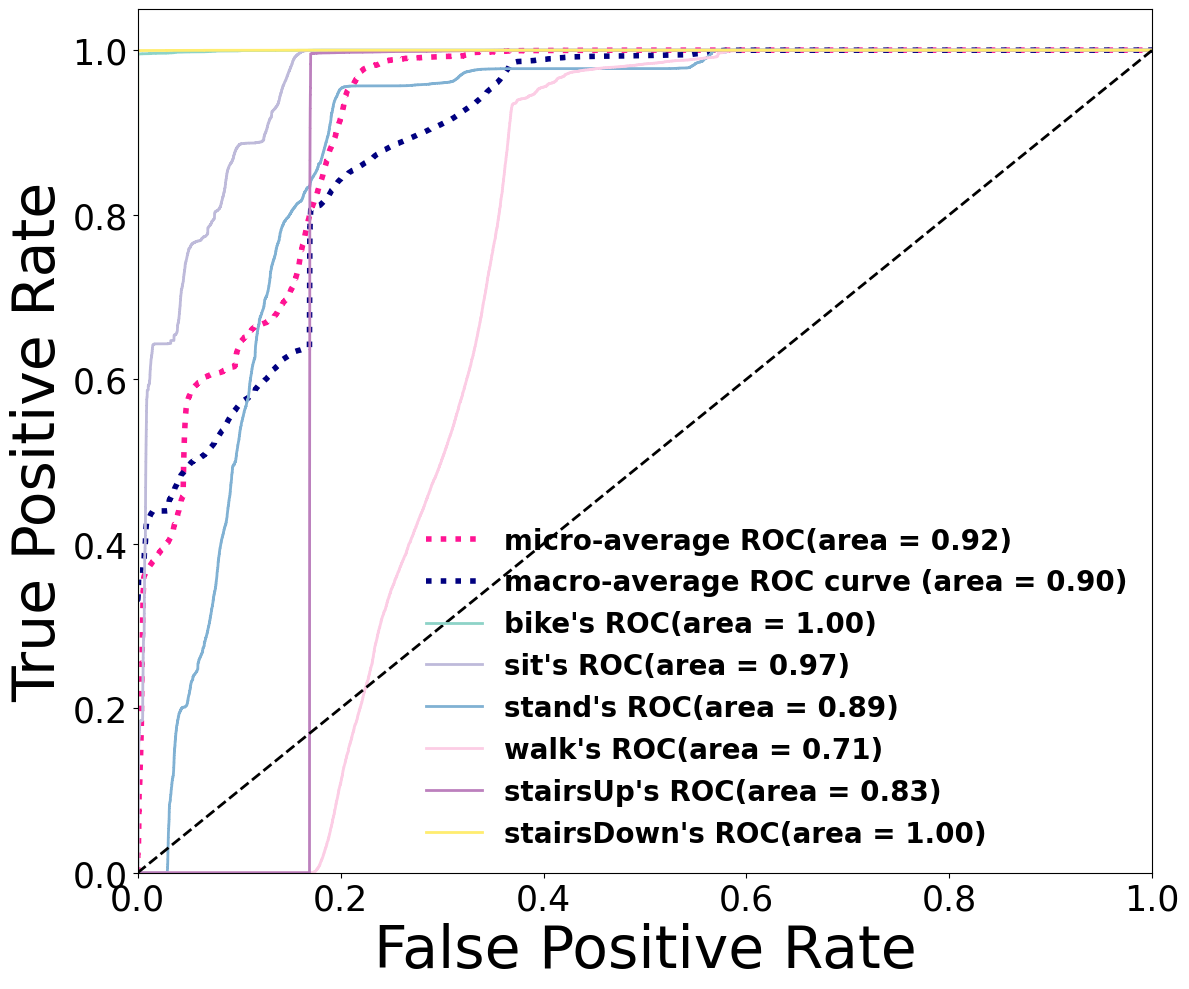

<ipython-input-20-593d3b4d9314>:68: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, num_classes))


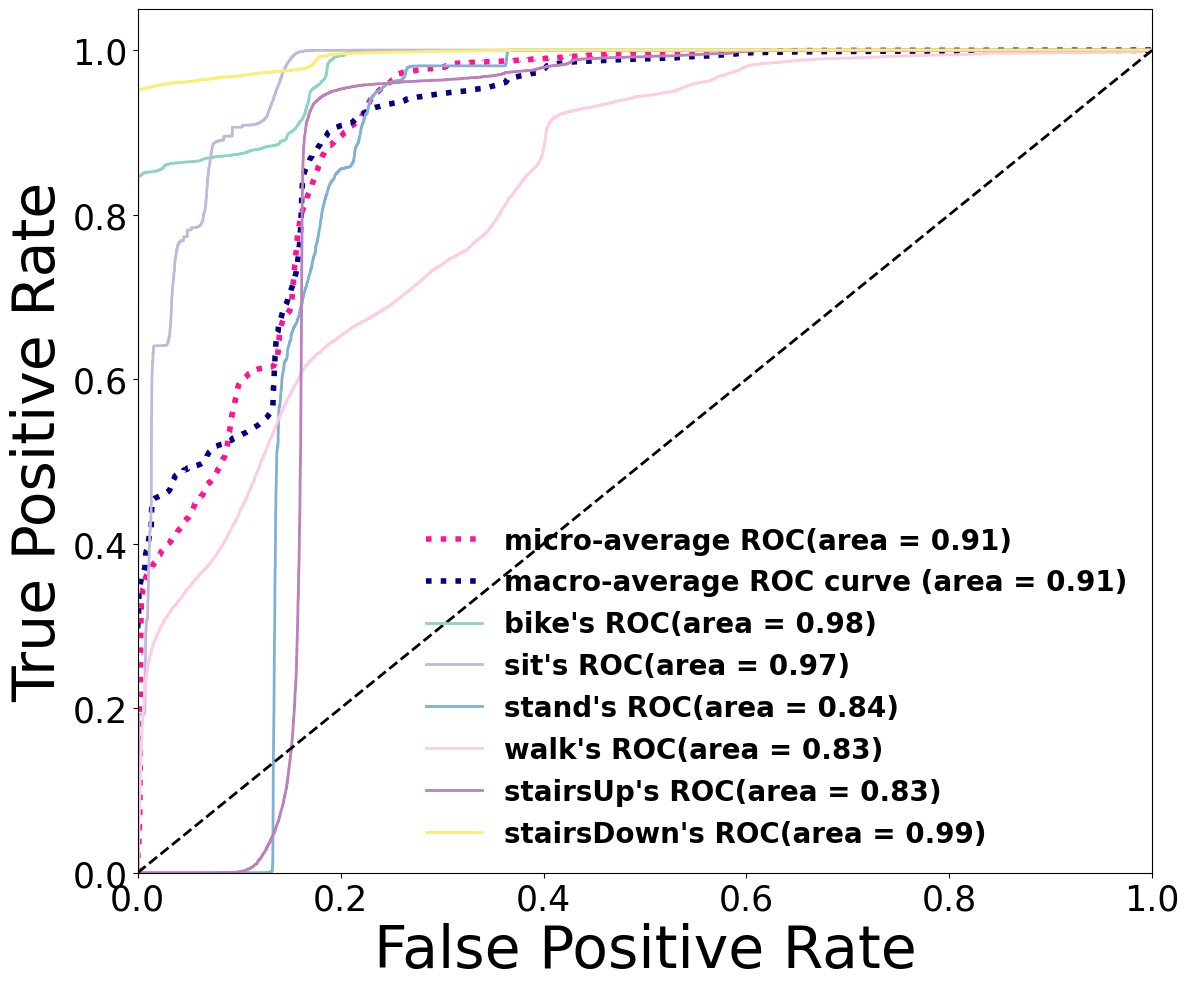

Source Accuracy: 91.84%
Target Accuracy: 71.72%


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_roc_curve(model, data_loader, num_classes, dataset_name):
    model.eval()
    y_true = []
    y_score = []

    with torch.no_grad():
        for data, labels in data_loader:
            outputs, _ = model(data)
            y_true.extend(labels.cpu().numpy())
            y_score.extend(outputs.cpu().numpy())

    y_true = np.array(y_true)
    y_score = np.array(y_score)

    # Binarize the output
    y_true = label_binarize(y_true, classes=range(num_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(num_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= num_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    class_names = {
        0: 'bike',
        1: 'sit',
        2: 'stand',
        3: 'walk',
        4: 'stairsUp',
        5: 'stairsDown'
    }

    # Plot all ROC curves
    plt.figure(figsize=(12, 10))
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC(area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

    colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, num_classes))
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='{0}\'s ROC(area = {1:0.2f})'
                 ''.format(class_names[i], roc_auc[i]))
    # plt.figure(figsize=(10, 6))
    plt.rcParams["font.family"] = "DejaVu Sans"
    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=42)
    plt.ylabel('True Positive Rate', fontsize=42)
    # plt.title(f'Receiver Operating Characteristic (ROC) Curve - {dataset_name}, Heterogeneity Dataset', fontsize=19)
    plt.legend(loc="lower right",prop={'size': 20, 'weight': 'bold'}, frameon=False)
    plt.tight_layout()
    plt.savefig(f'roc_curve_{dataset_name}_heterogeneity_data.eps',format='eps',bbox_inches='tight',transparent=True)
    plt.show()

# Assuming you have your model and data loaders defined
# Plot ROC curves for source and target datasets
plot_roc_curve(model, source_loader, num_classes, "Source Dataset")
plot_roc_curve(model, target_loader, num_classes, "Target Dataset")

# Calculate and print accuracies
def calculate_accuracy(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, labels in data_loader:
            outputs, _ = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

source_accuracy = calculate_accuracy(model, source_loader)
target_accuracy = calculate_accuracy(model, target_loader)

print(f"Source Accuracy: {source_accuracy:.2f}%")
print(f"Target Accuracy: {target_accuracy:.2f}%")

<ipython-input-19-5ee96d904628>:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, num_classes))


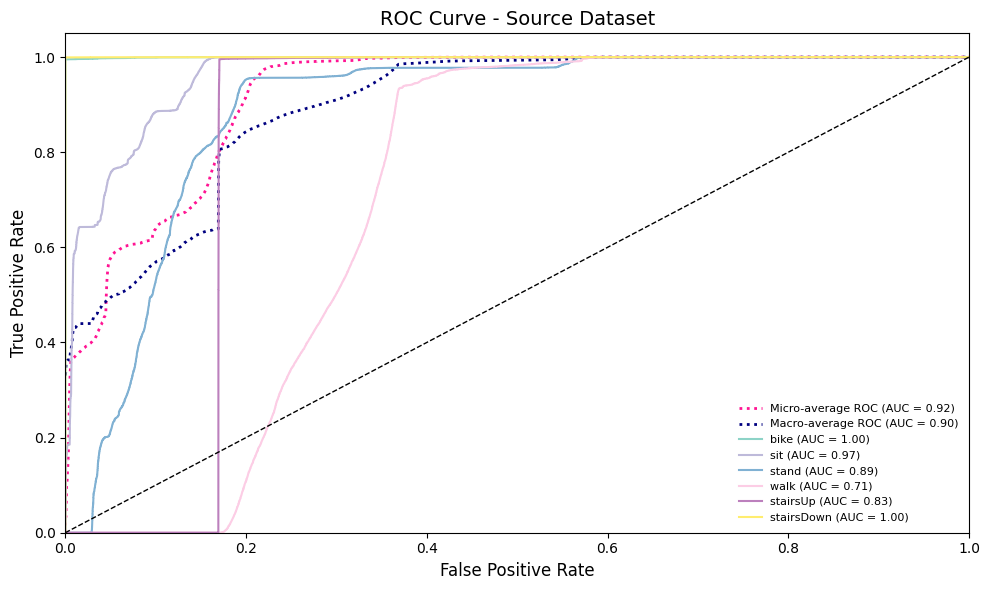

<ipython-input-19-5ee96d904628>:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, num_classes))


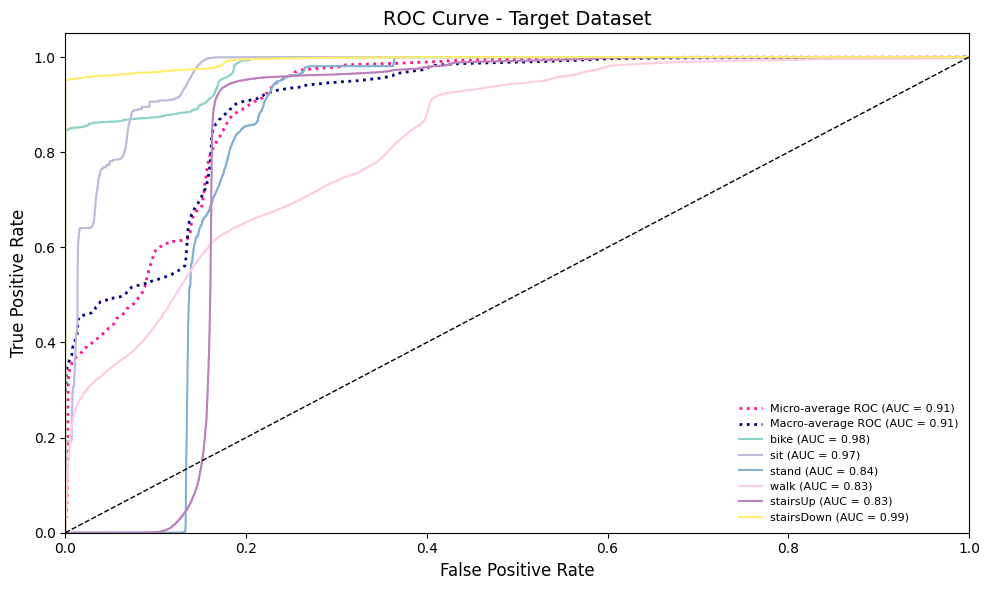

Source Accuracy: 91.84%
Target Accuracy: 71.72%


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_roc_curve(model, data_loader, num_classes, dataset_name):
    model.eval()
    y_true = []
    y_score = []

    with torch.no_grad():
        for data, labels in data_loader:
            outputs, _ = model(data)
            y_true.extend(labels.cpu().numpy())
            y_score.extend(outputs.cpu().numpy())

    y_true = np.array(y_true)
    y_score = np.array(y_score)

    # Binarize the output
    y_true = label_binarize(y_true, classes=range(num_classes))

    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # Compute macro-average ROC curve and ROC area
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(num_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
    mean_tpr /= num_classes
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    class_names = {
        0: 'bike',
        1: 'sit',
        2: 'stand',
        3: 'walk',
        4: 'stairsUp',
        5: 'stairsDown'
    }

    # Create a rectangular figure with fixed size
    plt.figure(figsize=(10, 6))  # Width: 10 inches, Height: 6 inches

    # Plot micro-average ROC curve
    plt.plot(fpr["micro"], tpr["micro"],
             label='Micro-average ROC (AUC = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=2)

    # Plot macro-average ROC curve
    plt.plot(fpr["macro"], tpr["macro"],
             label='Macro-average ROC (AUC = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=2)

    # Plot ROC curves for each class
    colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, num_classes))
    for i, color in zip(range(num_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=1.5,
                 label='{0} (AUC = {1:0.2f})'
                 ''.format(class_names[i], roc_auc[i]))

    # Plot the diagonal line
    plt.plot([0, 1], [0, 1], 'k--', lw=1)

    # Set font properties
    plt.rcParams["font.family"] = "DejaVu Sans"
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    # Set axis limits and labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)

    # Add title
    plt.title(f'ROC Curve - {dataset_name}', fontsize=14)

    # Add legend
    plt.legend(loc="lower right", prop={'size': 8}, frameon=False)

    # Adjust layout and save
    plt.tight_layout()
    plt.savefig(f'roc_curve_{dataset_name}_rectangular.eps', format='eps', bbox_inches='tight', dpi=300)
    plt.show()

def calculate_accuracy(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, labels in data_loader:
            outputs, _ = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

# Assuming you have your model, source_loader, and target_loader defined

# Plot ROC curves for source and target datasets
plot_roc_curve(model, source_loader, num_classes, "Source Dataset")
plot_roc_curve(model, target_loader, num_classes, "Target Dataset")

# Calculate and print accuracies
source_accuracy = calculate_accuracy(model, source_loader)
target_accuracy = calculate_accuracy(model, target_loader)

print(f"Source Accuracy: {source_accuracy:.2f}%")
print(f"Target Accuracy: {target_accuracy:.2f}%")

### UCI HAR

In [ ]:
!wget 'https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip'

--2024-10-11 16:59:39--  https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘human+activity+recognition+using+smartphones.zip’

human+activity+reco     [              <=>   ]  58.18M  15.7MB/s    in 4.8s    

2024-10-11 16:59:44 (12.1 MB/s) - ‘human+activity+recognition+using+smartphones.zip’ saved [61005872]



In [ ]:
!unzip '/content/human+activity+recognition+using+smartphones.zip'
!unzip '/content/UCI HAR Dataset.zip'

Archive:  /content/human+activity+recognition+using+smartphones.zip
 extracting: UCI HAR Dataset.names   
 extracting: UCI HAR Dataset.zip     
Archive:  /content/UCI HAR Dataset.zip
   creating: UCI HAR Dataset/
  inflating: UCI HAR Dataset/.DS_Store  
   creating: __MACOSX/
   creating: __MACOSX/UCI HAR Dataset/
  inflating: __MACOSX/UCI HAR Dataset/._.DS_Store  
  inflating: UCI HAR Dataset/activity_labels.txt  
  inflating: __MACOSX/UCI HAR Dataset/._activity_labels.txt  
  inflating: UCI HAR Dataset/features.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features.txt  
  inflating: UCI HAR Dataset/features_info.txt  
  inflating: __MACOSX/UCI HAR Dataset/._features_info.txt  
  inflating: UCI HAR Dataset/README.txt  
  inflating: __MACOSX/UCI HAR Dataset/._README.txt  
   creating: UCI HAR Dataset/test/
   creating: UCI HAR Dataset/test/Inertial Signals/
  inflating: UCI HAR Dataset/test/Inertial Signals/body_acc_x_test.txt  
   creating: __MACOSX/UCI HAR Dataset/test/
   creating:

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from cvxopt import matrix, solvers
import torch.nn.functional as F
import math

# Data loading functions
def load_data(file_path):
    return np.loadtxt(file_path)

def load_labels(file_path):
    with open(file_path, 'r') as f:
        labels = [line.strip() for line in f.readlines()]
    return np.array(labels, dtype=int)

# KAN implementation
class KANLinear(torch.nn.Module):
    def __init__(
        self,
        in_features,
        out_features,
        grid_size=5,
        spline_order=3,
        scale_noise=0.1,
        scale_base=1.0,
        scale_spline=1.0,
        enable_standalone_scale_spline=True,
        base_activation=torch.nn.SiLU,
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KANLinear, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.grid_size = grid_size
        self.spline_order = spline_order

        h = (grid_range[1] - grid_range[0]) / grid_size
        grid = (
            (
                torch.arange(-spline_order, grid_size + spline_order + 1) * h
                + grid_range[0]
            )
            .expand(in_features, -1)
            .contiguous()
        )
        self.register_buffer("grid", grid)

        self.base_weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.spline_weight = torch.nn.Parameter(
            torch.Tensor(out_features, in_features, grid_size + spline_order)
        )
        if enable_standalone_scale_spline:
            self.spline_scaler = torch.nn.Parameter(
                torch.Tensor(out_features, in_features)
            )

        self.scale_noise = scale_noise
        self.scale_base = scale_base
        self.scale_spline = scale_spline
        self.enable_standalone_scale_spline = enable_standalone_scale_spline
        self.base_activation = base_activation()
        self.grid_eps = grid_eps

        self.reset_parameters()

    def reset_parameters(self):
        torch.nn.init.kaiming_uniform_(self.base_weight, a=math.sqrt(5) * self.scale_base)
        with torch.no_grad():
            noise = (
                (
                    torch.rand(self.grid_size + 1, self.in_features, self.out_features)
                    - 1 / 2
                )
                * self.scale_noise
                / self.grid_size
            )
            self.spline_weight.data.copy_(
                (self.scale_spline if not self.enable_standalone_scale_spline else 1.0)
                * self.curve2coeff(
                    self.grid.T[self.spline_order : -self.spline_order],
                    noise,
                )
            )
            if self.enable_standalone_scale_spline:
                torch.nn.init.kaiming_uniform_(self.spline_scaler, a=math.sqrt(5) * self.scale_spline)

    def b_splines(self, x: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features

        grid: torch.Tensor = self.grid
        x = x.unsqueeze(-1)
        bases = ((x >= grid[:, :-1]) & (x < grid[:, 1:])).to(x.dtype)
        for k in range(1, self.spline_order + 1):
            bases = (
                (x - grid[:, : -(k + 1)])
                / (grid[:, k:-1] - grid[:, : -(k + 1)])
                * bases[:, :, :-1]
            ) + (
                (grid[:, k + 1 :] - x)
                / (grid[:, k + 1 :] - grid[:, 1:(-k)])
                * bases[:, :, 1:]
            )

        assert bases.size() == (
            x.size(0),
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return bases.contiguous()

    def curve2coeff(self, x: torch.Tensor, y: torch.Tensor):
        assert x.dim() == 2 and x.size(1) == self.in_features
        assert y.size() == (x.size(0), self.in_features, self.out_features)

        A = self.b_splines(x).transpose(0, 1)
        B = y.transpose(0, 1)
        solution = torch.linalg.lstsq(A, B).solution
        result = solution.permute(2, 0, 1)

        assert result.size() == (
            self.out_features,
            self.in_features,
            self.grid_size + self.spline_order,
        )
        return result.contiguous()

    @property
    def scaled_spline_weight(self):
        return self.spline_weight * (
            self.spline_scaler.unsqueeze(-1)
            if self.enable_standalone_scale_spline
            else 1.0
        )

    def forward(self, x: torch.Tensor):
        assert x.size(-1) == self.in_features
        original_shape = x.shape
        x = x.view(-1, self.in_features)

        base_output = F.linear(self.base_activation(x), self.base_weight)
        spline_output = F.linear(
            self.b_splines(x).view(x.size(0), -1),
            self.scaled_spline_weight.view(self.out_features, -1),
        )
        output = base_output + spline_output

        output = output.view(*original_shape[:-1], self.out_features)
        return output

    @torch.no_grad()
    def update_grid(self, x: torch.Tensor, margin=0.01):
        assert x.dim() == 2 and x.size(1) == self.in_features
        batch = x.size(0)

        splines = self.b_splines(x)
        splines = splines.permute(1, 0, 2)
        orig_coeff = self.scaled_spline_weight
        orig_coeff = orig_coeff.permute(1, 2, 0)
        unreduced_spline_output = torch.bmm(splines, orig_coeff)
        unreduced_spline_output = unreduced_spline_output.permute(1, 0, 2)

        x_sorted = torch.sort(x, dim=0)[0]
        grid_adaptive = x_sorted[
            torch.linspace(
                0, batch - 1, self.grid_size + 1, dtype=torch.int64, device=x.device
            )
        ]

        uniform_step = (x_sorted[-1] - x_sorted[0] + 2 * margin) / self.grid_size
        grid_uniform = (
            torch.arange(
                self.grid_size + 1, dtype=torch.float32, device=x.device
            ).unsqueeze(1)
            * uniform_step
            + x_sorted[0]
            - margin
        )

        grid = self.grid_eps * grid_uniform + (1 - self.grid_eps) * grid_adaptive
        grid = torch.concatenate(
            [
                grid[:1]
                - uniform_step
                * torch.arange(self.spline_order, 0, -1, device=x.device).unsqueeze(1),
                grid,
                grid[-1:]
                + uniform_step
                * torch.arange(1, self.spline_order + 1, device=x.device).unsqueeze(1),
            ],
            dim=0,
        )

        self.grid.copy_(grid.T)
        self.spline_weight.data.copy_(self.curve2coeff(x, unreduced_spline_output))

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        l1_fake = self.spline_weight.abs().mean(-1)
        regularization_loss_activation = l1_fake.sum()
        p = l1_fake / regularization_loss_activation
        regularization_loss_entropy = -torch.sum(p * p.log())
        return (
            regularize_activation * regularization_loss_activation
            + regularize_entropy * regularization_loss_entropy
        )

class KAN(torch.nn.Module):
    def __init__(
        self,
        layers_hidden,
        grid_size=5,
        spline_order=3,
        scale_noise=0.1,
        scale_base=1.0,
        scale_spline=1.0,
        base_activation=torch.nn.SiLU,
        grid_eps=0.02,
        grid_range=[-1, 1],
    ):
        super(KAN, self).__init__()
        self.grid_size = grid_size
        self.spline_order = spline_order

        self.layers = torch.nn.ModuleList()
        for in_features, out_features in zip(layers_hidden, layers_hidden[1:]):
            self.layers.append(
                KANLinear(
                    in_features,
                    out_features,
                    grid_size=grid_size,
                    spline_order=spline_order,
                    scale_noise=scale_noise,
                    scale_base=scale_base,
                    scale_spline=scale_spline,
                    base_activation=base_activation,
                    grid_eps=grid_eps,
                    grid_range=grid_range,
                )
            )

    def forward(self, x: torch.Tensor, update_grid=False):
        for layer in self.layers:
            if update_grid:
                layer.update_grid(x)
            x = layer(x)
        return x

    def regularization_loss(self, regularize_activation=1.0, regularize_entropy=1.0):
        return sum(
            layer.regularization_loss(regularize_activation, regularize_entropy)
            for layer in self.layers
        )

# KMM implementation
def kernel(X, Y, sigma=1.0):
    X_norm = torch.sum(X**2, dim=1).view(-1, 1)
    Y_norm = torch.sum(Y**2, dim=1).view(1, -1)
    dist = X_norm + Y_norm - 2.0 * torch.mm(X, Y.t())
    return torch.exp(-dist / (2.0 * sigma**2))

def kmm(X_source, X_target, sigma=1.0, B=1000.0, eps=None):
    n_source = X_source.shape[0]
    n_target = X_target.shape[0]

    if eps is None:
        eps = B / np.sqrt(n_source)

    X_source_np = X_source.cpu().numpy()
    X_target_np = X_target.cpu().numpy()

    K = kernel(torch.from_numpy(X_source_np), torch.from_numpy(X_source_np), sigma).cpu().numpy()
    kappa = torch.mean(kernel(torch.from_numpy(X_source_np), torch.from_numpy(X_target_np), sigma), dim=1).cpu().numpy()

    K = np.ascontiguousarray(K.astype(np.double))
    kappa = np.ascontiguousarray(kappa.astype(np.double))

    K = matrix(K)
    kappa = matrix(kappa)

    G = matrix(np.r_[np.ones((1, n_source)), -np.ones((1, n_source)), np.eye(n_source), -np.eye(n_source)])
    h = matrix(np.r_[n_source * (1 + eps), n_source * (eps - 1), B * np.ones((n_source,)), np.zeros((n_source,))])

    sol = solvers.qp(K, -kappa, G, h)

    if sol['status'] != 'optimal':
        raise ValueError("QP solver did not converge to an optimal solution.")

    beta = np.array(sol['x']).flatten()
    return torch.from_numpy(beta).float()

# Generator and Discriminator using KAN
class Generator(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(Generator, self).__init__()
        self.kan = KAN(
            layers_hidden=[input_size, hidden_size, hidden_size, input_size],
            grid_size=5,
            spline_order=3,
            scale_noise=0.1,
            scale_base=1.0,
            scale_spline=1.0,
            base_activation=torch.nn.SiLU,
            grid_eps=0.02,
            grid_range=[-1, 1]
        )

    def forward(self, x):
        return self.kan(x)

class Discriminator(nn.Module):
    def __init__(self, input_size):
        super(Discriminator, self).__init__()
        self.kan = KAN(
            layers_hidden=[input_size, 64, 32, 1],
            grid_size=5,
            spline_order=3,
            scale_noise=0.1,
            scale_base=1.0,
            scale_spline=1.0,
            base_activation=torch.nn.SiLU,
            grid_eps=0.02,
            grid_range=[-1, 1]
        )

    def forward(self, x):
        return self.kan(x).squeeze()

# UDDAA_RNN model
class UDDAA_RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(UDDAA_RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.lstm(x.unsqueeze(1), (h0, c0))
        features = out[:, -1, :]
        class_output = self.fc(features)
        return class_output, features

# MMCD computation
def compute_mean_and_cov(features, labels):
    means = []
    covs = []
    for c in range(num_classes):
        class_features = features[labels == c]
        if len(class_features) > 1:  # Ensure we have at least 2 samples
            mean = torch.mean(class_features, dim=0)
            centered = class_features - mean
            # Use a more stable covariance computation
            cov = torch.mm(centered.t(), centered) / (len(class_features) - 1 + 1e-8)
            # Add a small value to the diagonal for numerical stability
            cov += torch.eye(cov.shape[0], device=cov.device) * 1e-6
        else:
            mean = torch.zeros_like(features[0])
            cov = torch.eye(features.shape[1], device=features.device) * 1e-6
        means.append(mean)
        covs.append(cov)
    return torch.stack(means), torch.stack(covs)

def compute_mmcd(source_features, target_features, source_labels, target_pseudo_labels, num_classes):
    source_means, source_covs = compute_mean_and_cov(source_features, source_labels)
    target_means, target_covs = compute_mean_and_cov(target_features, target_pseudo_labels)

    # Mean discrepancy
    mean_discrepancy = torch.mean(torch.pow(source_means - target_means, 2))

    # Covariance discrepancy
    cov_discrepancy = torch.mean(torch.pow(source_covs - target_covs, 2))

    mmcd = mean_discrepancy + cov_discrepancy

    return mmcd
def compute_gradient_penalty(discriminator, real_samples, fake_samples):
    alpha = torch.rand(real_samples.size(0), 1, device=real_samples.device)
    interpolates = (alpha * real_samples + (1 - alpha) * fake_samples).requires_grad_(True)
    d_interpolates = discriminator(interpolates)
    gradients = torch.autograd.grad(outputs=d_interpolates, inputs=interpolates,
                                    grad_outputs=torch.ones_like(d_interpolates),
                                    create_graph=True, retain_graph=True)[0]
    gradient_penalty = ((gradients.norm(2, dim=1) - 1) ** 2).mean()
    return gradient_penalty

# Training function
def train_uddaa_kmm_gan(model, generator, discriminator, source_loader, target_loader, num_epochs, learning_rate, num_classes):
    optimizer_m = optim.Adam(model.parameters(), lr=learning_rate)
    optimizer_g = optim.Adam(generator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
    optimizer_d = optim.Adam(discriminator.parameters(), lr=learning_rate, betas=(0.5, 0.999))
    criterion = nn.CrossEntropyLoss(reduction='none')

    # Apply KMM
    X_source = source_loader.dataset.tensors[0]
    X_target = target_loader.dataset.tensors[0]
    beta = kmm(X_source, X_target)

    for epoch in range(num_epochs):
        model.train()
        generator.train()
        discriminator.train()
        total_loss = 0

        for (source_data, source_labels), (target_data, _) in zip(source_loader, target_loader):
            batch_size = source_data.size(0)
            beta_batch = beta[:batch_size].to(source_data.device)

            # Train Discriminator
            optimizer_d.zero_grad()

            noise = torch.randn(batch_size, source_data.size(1), device=source_data.device)
            with torch.no_grad():
                fake_target = generator(noise)

            real_source = discriminator(source_data)
            real_target = discriminator(target_data)
            fake_target_output = discriminator(fake_target)

            d_loss = -(torch.mean(F.logsigmoid(real_source)) +
                       torch.mean(F.logsigmoid(-real_target)) +
                       torch.mean(F.logsigmoid(-fake_target_output)))

            gradient_penalty = compute_gradient_penalty(discriminator, source_data, fake_target)
            d_loss += 10 * gradient_penalty

            d_loss.backward()
            optimizer_d.step()

            # Train Generator
            optimizer_g.zero_grad()

            noise = torch.randn(batch_size, source_data.size(1), device=source_data.device)
            fake_target = generator(noise)
            fake_target_output = discriminator(fake_target)

            g_loss = -torch.mean(F.logsigmoid(fake_target_output))

            g_loss.backward()
            optimizer_g.step()

            # Train UDDAA model
            optimizer_m.zero_grad()

            source_class_output, source_features = model(source_data)
            target_class_output, target_features = model(target_data)
            fake_target_class_output, fake_target_features = model(fake_target.detach())

            source_loss = criterion(source_class_output, source_labels)

            with torch.no_grad():
                target_pseudo_labels = torch.argmax(target_class_output, dim=1)
            mmcd_loss = compute_mmcd(source_features, target_features, source_labels, target_pseudo_labels, num_classes)

            fake_target_loss = criterion(fake_target_class_output, torch.argmax(source_class_output.detach(), dim=1))

            loss = source_loss + 0.1 * mmcd_loss + 0.1 * fake_target_loss
            weighted_loss = torch.mean(beta_batch * loss)

            g_reg_loss = generator.kan.regularization_loss()
            d_reg_loss = discriminator.kan.regularization_loss()

            total_loss = weighted_loss + g_reg_loss + d_reg_loss

            total_loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer_m.step()

            total_loss += total_loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(source_loader):.4f}")
        print(f"G output range: {fake_target.min().item():.4f} to {fake_target.max().item():.4f}")
        print(f"D real output range: {real_source.min().item():.4f} to {real_source.max().item():.4f}")
        print(f"D fake output range: {fake_target_output.min().item():.4f} to {fake_target_output.max().item():.4f}")

# Evaluation function
def evaluate(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, labels in data_loader:
            outputs, _ = model(data)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    return accuracy

# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    X_source = load_data('UCI HAR Dataset/train/X_train.txt')
    y_source = load_labels('UCI HAR Dataset/train/y_train.txt')
    X_target = load_data('UCI HAR Dataset/test/X_test.txt')
    y_target = load_labels('UCI HAR Dataset/test/y_test.txt')

    scaler = StandardScaler()
    X_source = scaler.fit_transform(X_source)
    X_target = scaler.transform(X_target)

    def create_domain_shift(X, shift_factor=1.2, rotation_angle=np.pi/12):
        rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                                    [np.sin(rotation_angle), np.cos(rotation_angle)]])
        X_2d = X[:, :2]
        X_2d_rotated = np.dot(X_2d, rotation_matrix) * shift_factor
        X_shifted = X.copy()
        X_shifted[:, :2] = X_2d_rotated
        return X_shifted

    X_target = create_domain_shift(X_target)

    X_source = torch.FloatTensor(X_source)
    y_source = torch.LongTensor(y_source) - 1
    X_target = torch.FloatTensor(X_target)
    y_target = torch.LongTensor(y_target) - 1

    source_dataset = TensorDataset(X_source, y_source)
    target_dataset = TensorDataset(X_target, y_target)
    source_loader = DataLoader(source_dataset, batch_size=32, shuffle=True)
    target_loader = DataLoader(target_dataset, batch_size=32, shuffle=True)

    # Model parameters
    input_size = X_source.shape[1]
    hidden_size = 128
    num_layers = 2
    num_classes = len(np.unique(y_source))
    num_epochs = 50
    learning_rate = 0.0001

    model = UDDAA_RNN(input_size, hidden_size, num_layers, num_classes)
    generator = Generator(input_size, hidden_size)
    discriminator = Discriminator(input_size)

    # Train the model
    train_uddaa_kmm_gan(model, generator, discriminator, source_loader, target_loader, num_epochs, learning_rate, num_classes)

    # Evaluate on source and target datasets
    source_accuracy = evaluate(model, source_loader)
    target_accuracy = evaluate(model, target_loader)

    print(f"Source Accuracy: {source_accuracy:.2f}%")
    print(f"Target Accuracy: {target_accuracy:.2f}%")

     pcost       dcost       gap    pres   dres
 0:  4.1913e+03 -6.2681e+11  6e+11  2e-15  3e-08
 1:  4.1911e+03 -6.2688e+09  6e+09  5e-15  2e-09
 2:  4.1707e+03 -6.3386e+07  6e+07  2e-15  2e-11
 3:  2.8424e+03 -1.0811e+06  1e+06  5e-15  4e-13
 4:  4.9570e+02 -2.0321e+04  2e+04  2e-15  1e-13
 5:  7.3421e+01 -3.3931e+02  4e+02  3e-15  4e-14
 6:  1.0685e+01 -1.3344e+01  2e+01  5e-15  1e-13
 7:  1.5278e+00 -1.6620e+00  3e+00  9e-16  6e-13
 8:  2.1900e-01 -2.4103e-01  5e-01  6e-16  1e-14
 9:  3.1383e-02 -3.4491e-02  7e-02  2e-15  3e-14
10:  4.4971e-03 -4.9426e-03  9e-03  4e-15  9e-16
11:  6.4442e-04 -7.0824e-04  1e-03  3e-15  4e-15
12:  9.2344e-05 -1.0149e-04  2e-04  4e-15  2e-16
13:  1.3233e-05 -1.4543e-05  3e-05  8e-15  1e-17
14:  1.8962e-06 -2.0839e-06  4e-06  3e-15  2e-18
15:  2.7172e-07 -2.9862e-07  6e-07  2e-14  3e-19
16:  3.8937e-08 -4.2792e-08  8e-08  2e-14  1e-19
Optimal solution found.
Epoch [1/50], Loss: 17.8885
G output range: -4.3210 to 5.6100
D real output range: -1.2192 to 0

In [ ]:
from sklearn.metrics import classification_report

def evaluate(model, data_loader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for data, labels in data_loader:
            outputs, _ = model(data)
            _, predicted = torch.max(outputs.data, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Convert lists to numpy arrays
    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)

    # Calculate accuracy
    accuracy = 100 * np.mean(all_predictions == all_labels)

    # Generate classification report
    report = classification_report(all_labels, all_predictions, output_dict=True)
    report_str = classification_report(all_labels, all_predictions)

    return accuracy, report, report_str, all_labels, all_predictions

# Main execution
if __name__ == "__main__":
    # ... (previous code remains the same)

    # Train the model
    # train_uddaa_kmm_gan(model, generator, discriminator, source_loader, target_loader, num_epochs, learning_rate, num_classes)

    # Evaluate on source and target datasets
    source_accuracy, source_report, source_report_str, source_labels, source_predictions = evaluate(model, source_loader)
    target_accuracy, target_report, target_report_str, target_labels, target_predictions = evaluate(model, target_loader)

    print(f"Source Accuracy: {source_accuracy:.2f}%")
    print("Source Classification Report:")
    print(source_report_str)
    print(f"Source Macro F1-score: {source_report['macro avg']['f1-score']:.4f}")
    print(f"Source Weighted F1-score: {source_report['weighted avg']['f1-score']:.4f}")

    print(f"\nTarget Accuracy: {target_accuracy:.2f}%")
    print("Target Classification Report:")
    print(target_report_str)
    print(f"Target Macro F1-score: {target_report['macro avg']['f1-score']:.4f}")
    print(f"Target Weighted F1-score: {target_report['weighted avg']['f1-score']:.4f}")

Source Accuracy: 97.78%
Source Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1226
           1       0.99      0.99      0.99      1073
           2       1.00      1.00      1.00       986
           3       0.93      0.95      0.94      1286
           4       0.95      0.94      0.95      1374
           5       1.00      1.00      1.00      1407

    accuracy                           0.98      7352
   macro avg       0.98      0.98      0.98      7352
weighted avg       0.98      0.98      0.98      7352

Source Macro F1-score: 0.9792
Source Weighted F1-score: 0.9778

Target Accuracy: 94.23%
Target Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       496
           1       0.92      0.96      0.94       471
           2       0.98      0.88      0.92       420
           3       0.91      0.90      0.91       491
           4  

<ipython-input-5-35fd097effd5>:71: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, num_classes))


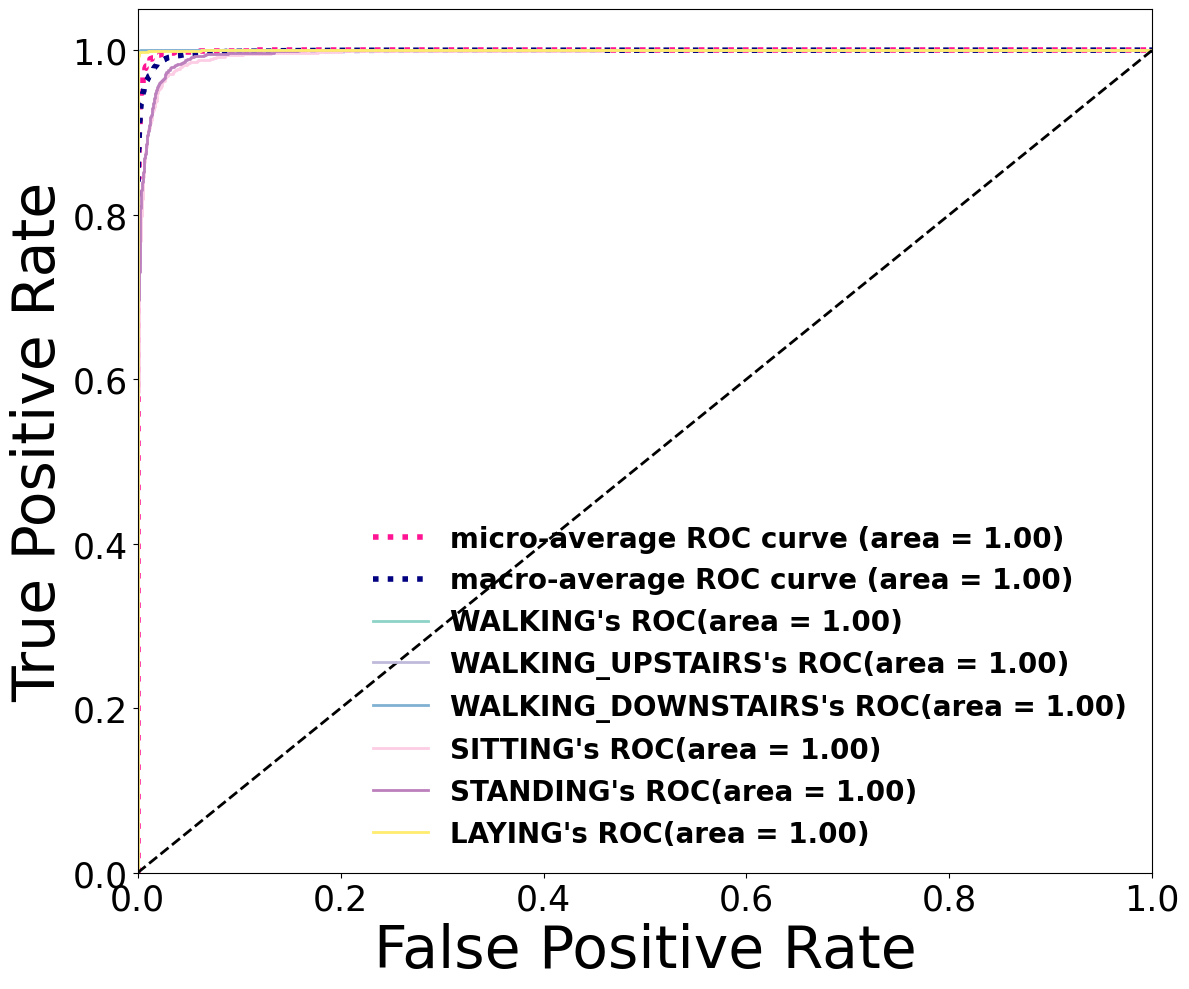

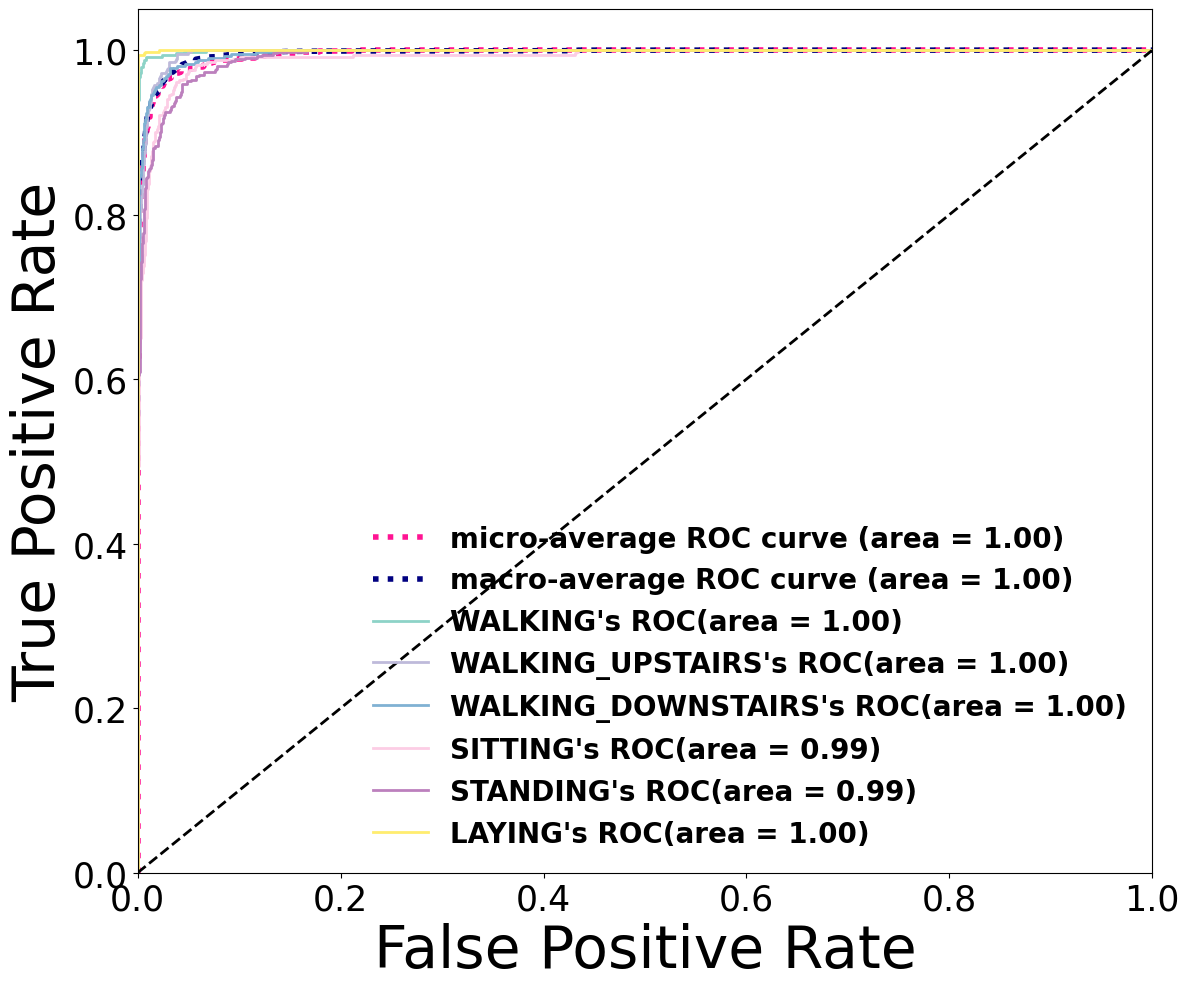

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_roc_curves(model, source_loader, target_loader, num_classes):
    def compute_roc_data(data_loader):
        model.eval()
        y_true = []
        y_score = []

        with torch.no_grad():
            for data, labels in data_loader:
                outputs, _ = model(data)
                y_true.extend(labels.cpu().numpy())
                y_score.extend(outputs.cpu().numpy())

        y_true = np.array(y_true)
        y_score = np.array(y_score)

        # Binarize the output
        y_true = label_binarize(y_true, classes=range(num_classes))

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Compute macro-average ROC curve and ROC area
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(num_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= num_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        return fpr, tpr, roc_auc

    def plot_roc(fpr, tpr, roc_auc, title):
        class_names = {
            0: 'WALKING',
            1: 'WALKING_UPSTAIRS',
            2: 'WALKING_DOWNSTAIRS',
            3: 'SITTING',
            4: 'STANDING',
            5: 'LAYING'
        }

        plt.figure(figsize=(12, 10))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)

        colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, num_classes))
        for i, color in zip(range(num_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label='{0}\'s ROC(area = {1:0.2f})'
                     ''.format(class_names[i], roc_auc[i]))

        plt.rcParams["font.family"] = "DejaVu Sans"
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        # plt.xscale('log')

        # # Adjust x and y axis limits
        # plt.xlim([1e-4, 1.0])
        # plt.ylim([0.9, 1.01])

        # # Add more tick marks
        # plt.xticks([1e-4, 1e-3, 1e-2, 1e-1, 1], ['0.0001', '0.001', '0.01', '0.1', '1'])
        # plt.yticks(np.arange(0.9, 1.01, 0.02))
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xticks(fontsize=25)
        plt.yticks(fontsize=25)
        plt.xlabel('False Positive Rate', fontsize=42)
        plt.ylabel('True Positive Rate', fontsize=42)
        # plt.title(f'Receiver Operating Characteristic (ROC) Curve,{title} UCI-HAR', fontsize=19)
        plt.legend(loc="lower right",prop={'size': 20, 'weight': 'bold'}, frameon=False)
        plt.tight_layout()
        plt.savefig(f'roc_curve_{title}_UCI_data.eps',format='eps', bbox_inches='tight',transparent=True)
        plt.show()

    # Compute ROC data for source and target datasets
    source_fpr, source_tpr, source_roc_auc = compute_roc_data(source_loader)
    target_fpr, target_tpr, target_roc_auc = compute_roc_data(target_loader)

    # Plot ROC curves
    plot_roc(source_fpr, source_tpr, source_roc_auc, "Source Dataset")
    plot_roc(target_fpr, target_tpr, target_roc_auc, "Target Dataset")

# Usage
num_classes = 6  # For UCI HAR Dataset
plot_roc_curves(model, source_loader, target_loader, num_classes)

<ipython-input-25-a734436ddf05>:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, num_classes))


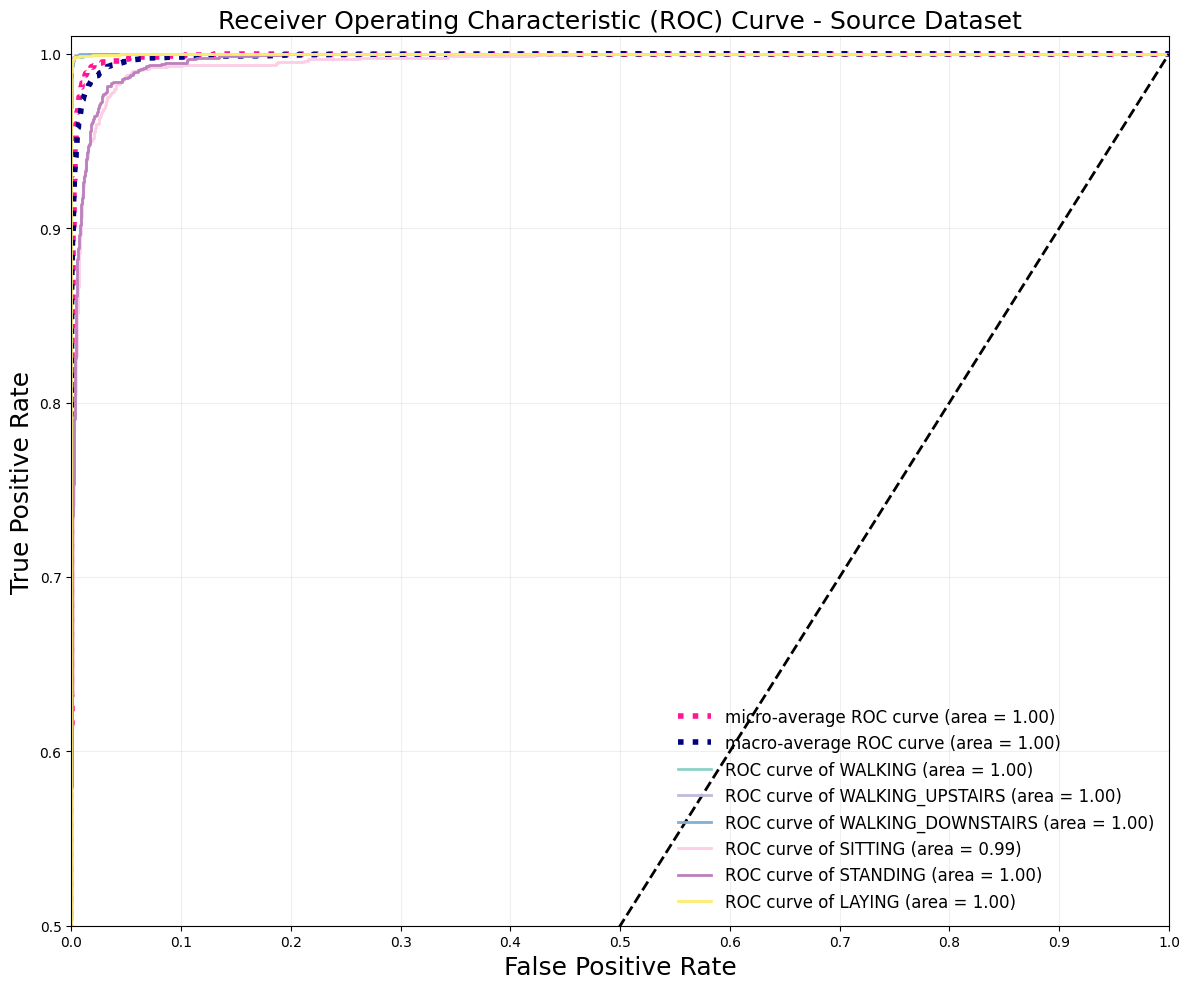

<ipython-input-25-a734436ddf05>:75: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, num_classes))


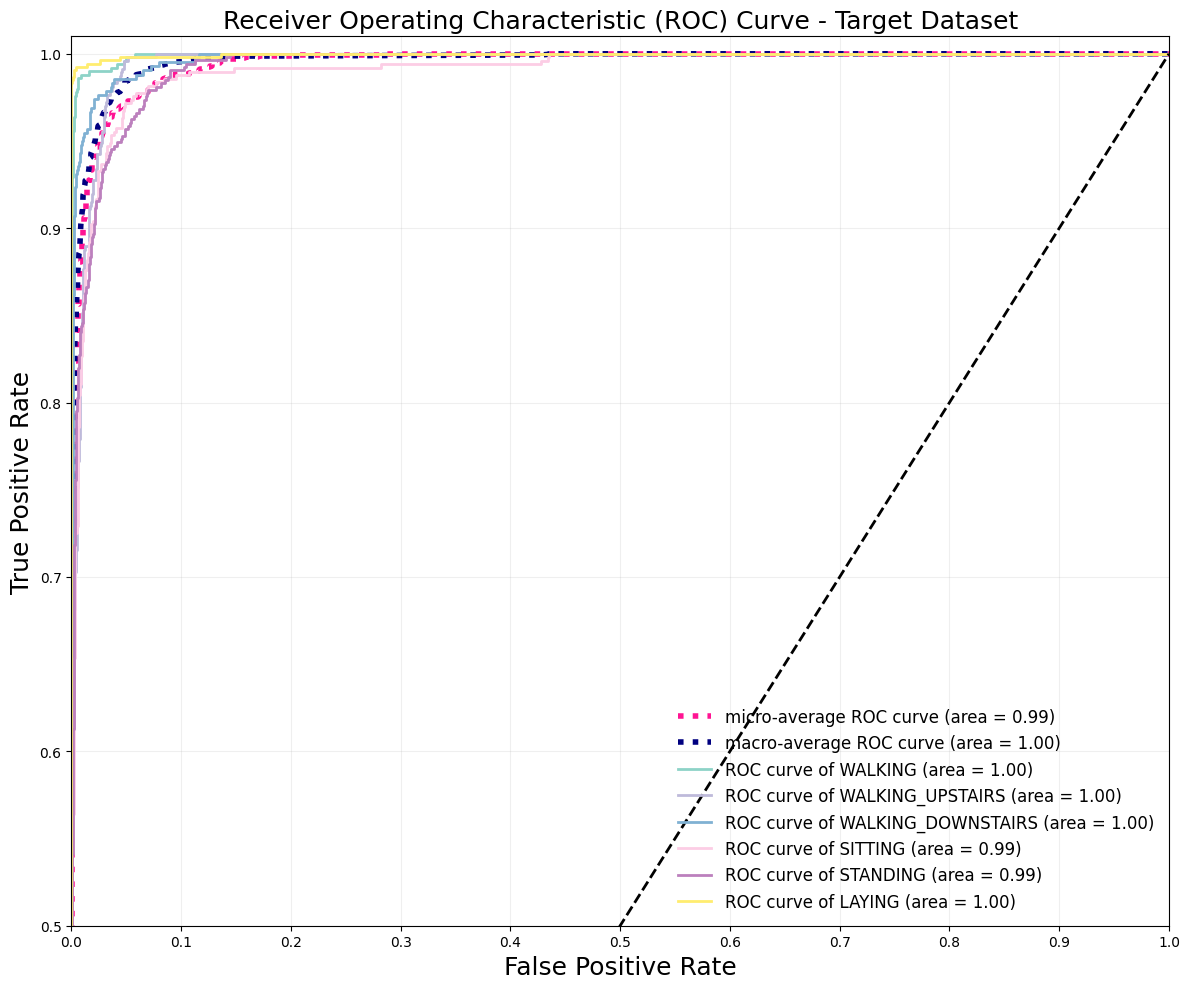

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
import torch

def plot_roc_curves(model, source_loader, target_loader, num_classes):
    def compute_roc_data(data_loader):
        model.eval()
        y_true = []
        y_score = []

        with torch.no_grad():
            for data, labels in data_loader:
                outputs, _ = model(data)
                y_true.extend(labels.cpu().numpy())
                y_score.extend(outputs.cpu().numpy())

        y_true = np.array(y_true)
        y_score = np.array(y_score)

        # Binarize the output
        y_true = label_binarize(y_true, classes=range(num_classes))

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        # Compute micro-average ROC curve and ROC area
        fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        # Compute macro-average ROC curve and ROC area
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(num_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= num_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        return fpr, tpr, roc_auc

    def plot_roc(fpr, tpr, roc_auc, title):
        class_names = {
            0: 'WALKING',
            1: 'WALKING_UPSTAIRS',
            2: 'WALKING_DOWNSTAIRS',
            3: 'SITTING',
            4: 'STANDING',
            5: 'LAYING'
        }

        plt.figure(figsize=(12, 10))

        # Plot micro-average ROC curve
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                      ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        # Plot macro-average ROC curve
        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                      ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        # Plot ROC curves for each class
        colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, num_classes))
        for i, color in zip(range(num_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                    label='ROC curve of {0} (area = {1:0.2f})'
                    ''.format(class_names[i], roc_auc[i]))

        plt.rcParams["font.sans-serif"] = "Times-New-Roman"
        plt.plot([0, 1], [0, 1], 'k--', lw=2)

        # Adjust x and y axis limits
        plt.xlim([0.0, 1.0])
        plt.ylim([0.5, 1.01])

        # Add more tick marks
        plt.xticks(np.arange(0, 1.1, 0.1))
        plt.yticks(np.arange(0.5, 1.05, 0.1))

        plt.xlabel('False Positive Rate', fontsize=18)
        plt.ylabel('True Positive Rate', fontsize=18)
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {title}', fontsize=18)
        plt.legend(loc="lower right", frameon=False, fontsize=12)
        plt.grid(True, which="both", ls="-", alpha=0.2)
        plt.tight_layout()
        plt.savefig(f'roc_curve_{title}_UCI_data.pdf', bbox_inches='tight', transparent=True)
        plt.show()

    # Compute ROC data for source and target datasets
    source_fpr, source_tpr, source_roc_auc = compute_roc_data(source_loader)
    target_fpr, target_tpr, target_roc_auc = compute_roc_data(target_loader)

    # Plot ROC curves
    plot_roc(source_fpr, source_tpr, source_roc_auc, "Source Dataset")
    plot_roc(target_fpr, target_tpr, target_roc_auc, "Target Dataset")

# Usage
num_classes = 6  # For UCI HAR Dataset
plot_roc_curves(model, source_loader, target_loader, num_classes)

<ipython-input-26-46f58c48e467>:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, num_classes))


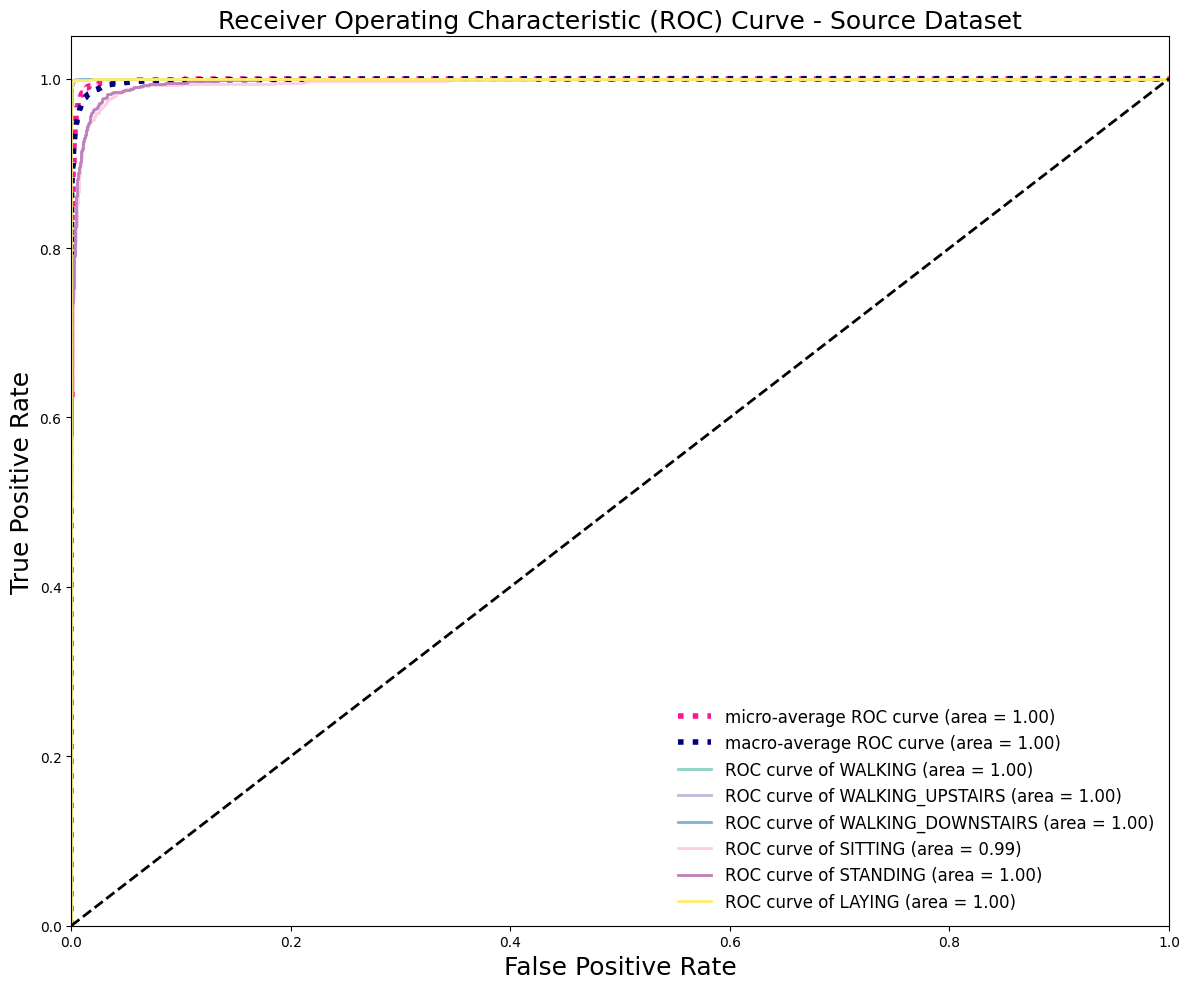

<ipython-input-26-46f58c48e467>:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, num_classes))


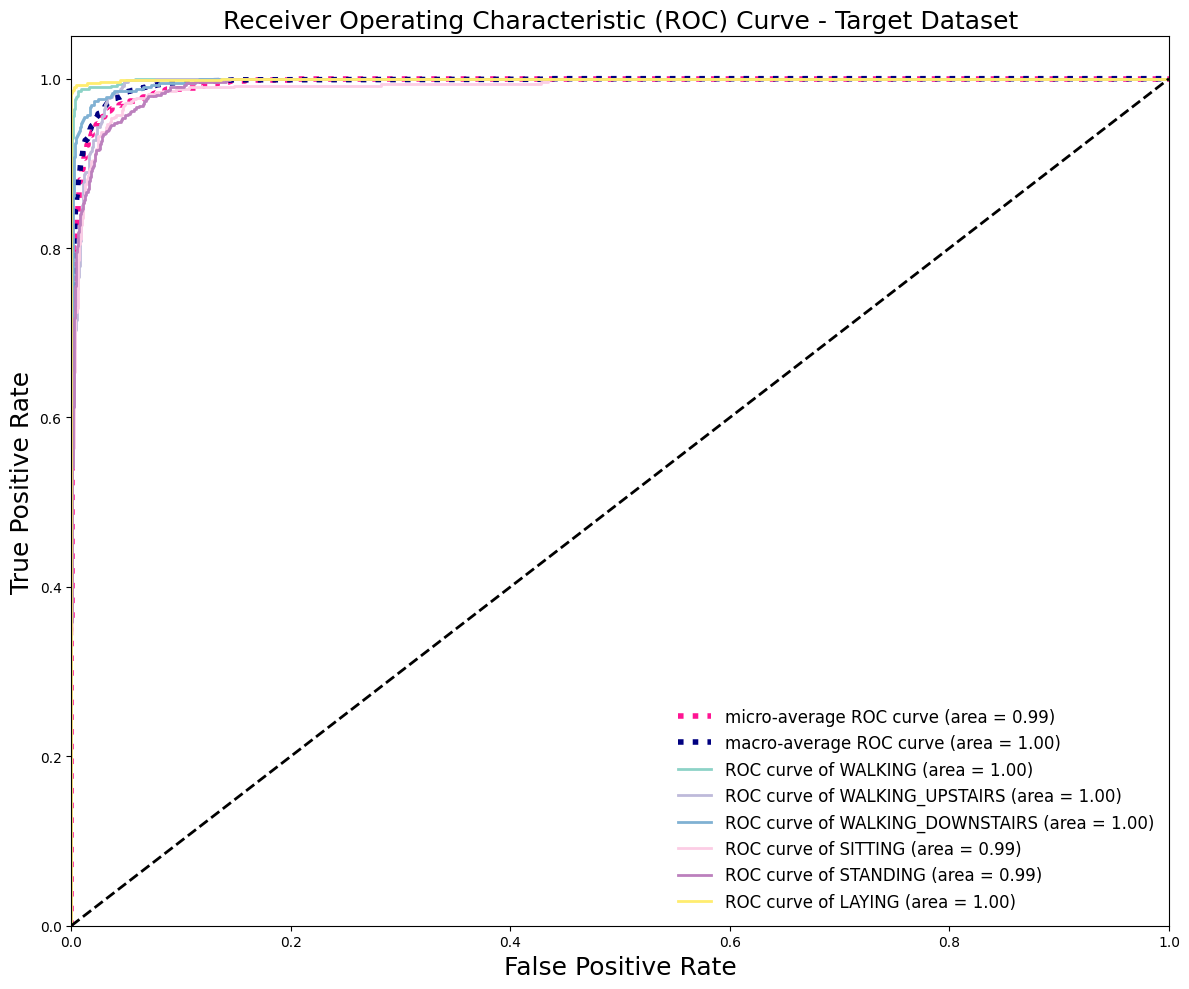

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import warnings
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Suppress font-related warnings
# warnings.filterwarnings("ignore", category=UserWarning, module="matplotlib")

# plt.rcParams['font.family'] = 'DejaVu Sans'
# plt.rcParams['font.serif'] = 'Times-New-Roman'

def plot_roc_curves(model, source_loader, target_loader, num_classes):
    def compute_roc_data(data_loader):
        model.eval()
        y_true = []
        y_score = []

        with torch.no_grad():
            for data, labels in data_loader:
                outputs, _ = model(data)
                y_true.extend(labels.cpu().numpy())
                y_score.extend(outputs.cpu().numpy())

        y_true = np.array(y_true)
        y_score = np.array(y_score)

        y_true = label_binarize(y_true, classes=range(num_classes))

        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(num_classes):
            fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i])

        fpr["micro"], tpr["micro"], _ = roc_curve(y_true.ravel(), y_score.ravel())
        roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
        mean_tpr = np.zeros_like(all_fpr)
        for i in range(num_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= num_classes
        fpr["macro"] = all_fpr
        tpr["macro"] = mean_tpr
        roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

        return fpr, tpr, roc_auc

    def plot_roc(fpr, tpr, roc_auc, title):
        class_names = {
            0: 'WALKING',
            1: 'WALKING_UPSTAIRS',
            2: 'WALKING_DOWNSTAIRS',
            3: 'SITTING',
            4: 'STANDING',
            5: 'LAYING'
        }

        plt.figure(figsize=(12, 10))
        plt.plot(fpr["micro"], tpr["micro"],
                 label='micro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["micro"]),
                 color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                 label='macro-average ROC curve (area = {0:0.2f})'
                       ''.format(roc_auc["macro"]),
                 color='navy', linestyle=':', linewidth=4)

        colors = plt.cm.get_cmap('Set3')(np.linspace(0, 1, num_classes))
        for i, color in zip(range(num_classes), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                     label='ROC curve of {0} (area = {1:0.2f})'
                     ''.format(class_names[i], roc_auc[i]))

        plt.rcParams["font.sans-serif"] = "Times-New-Roman"
        plt.plot([0, 1], [0, 1], 'k--', lw=2)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate', fontsize=18)
        plt.ylabel('True Positive Rate', fontsize=18)
        plt.title(f'Receiver Operating Characteristic (ROC) Curve - {title}', fontsize=18)
        plt.legend(loc="lower right",frameon=False, fontsize=12)
        plt.tight_layout()
        plt.savefig(f'roc_curve_{title}_UCI_data.pdf', bbox_inches='tight',transparent=True)
        plt.show()

    source_fpr, source_tpr, source_roc_auc = compute_roc_data(source_loader)
    target_fpr, target_tpr, target_roc_auc = compute_roc_data(target_loader)

    plot_roc(source_fpr, source_tpr, source_roc_auc, "Source Dataset")
    plot_roc(target_fpr, target_tpr, target_roc_auc, "Target Dataset")

# Usage
num_classes = 6  # For UCI HAR Dataset
plot_roc_curves(model, source_loader, target_loader, num_classes)

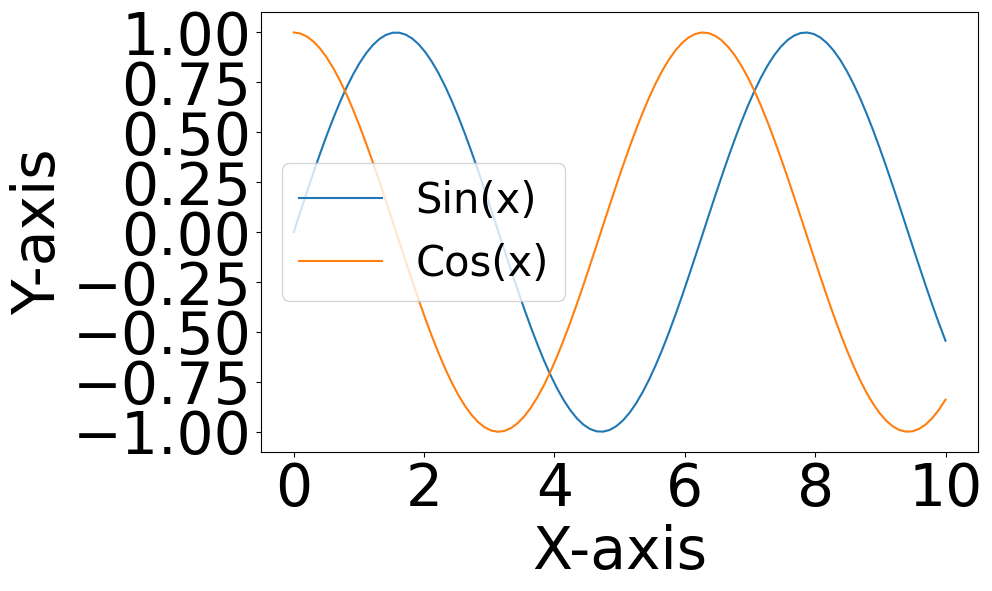

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate data
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y1, label='Sin(x)')
plt.plot(x, y2, label='Cos(x)')

# Set title and labels
# plt.title('Simple Trigonometric Functions', fontname='Times New Roman', fontsize=16)
plt.xlabel('X-axis', fontname='Times New Roman', fontsize=42)
plt.ylabel('Y-axis', fontname='Times New Roman', fontsize=42)

# Set legend
plt.legend(prop={'family': 'Times New Roman', 'size': 30},fontsize=42)

# Set ticks
plt.xticks(fontname='Times New Roman',fontsize=42)
plt.yticks(fontname='Times New Roman',fontsize=42)

# Adjust layout
plt.tight_layout()

# Save the plot in EPS format
# plt.savefig('trigonometric_functions.eps', format='eps')
plt.savefig('trigonometric_functions.pdf', format='pdf')

# Display the plot (optional)
plt.show()

### Comparision


In [ ]:
import numpy as np
import torch
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset

# Data loading functions
def load_data(file_path):
    return np.loadtxt(file_path)

def load_labels(file_path):
    with open(file_path, 'r') as f:
        labels = [line.strip() for line in f.readlines()]
    return np.array(labels, dtype=int)

# Create domain shift function
def create_domain_shift(X, shift_factor=1.2, rotation_angle=np.pi/12):
    rotation_matrix = np.array([[np.cos(rotation_angle), -np.sin(rotation_angle)],
                                [np.sin(rotation_angle), np.cos(rotation_angle)]])
    X_2d = X[:, :2]
    X_2d_rotated = np.dot(X_2d, rotation_matrix) * shift_factor
    X_shifted = X.copy()
    X_shifted[:, :2] = X_2d_rotated
    return X_shifted

# Load and preprocess data
X_source = load_data('UCI HAR Dataset/train/X_train.txt')
y_source = load_labels('UCI HAR Dataset/train/y_train.txt')
X_target = load_data('UCI HAR Dataset/test/X_test.txt')
y_target = load_labels('UCI HAR Dataset/test/y_test.txt')

# Standardize the data
scaler = StandardScaler()
X_source = scaler.fit_transform(X_source)
X_target = scaler.transform(X_target)

# Create domain shift in target data
X_target = create_domain_shift(X_target)

# Convert to PyTorch tensors
X_source = torch.FloatTensor(X_source)
y_source = torch.LongTensor(y_source) - 1  # Subtract 1 to make labels 0-indexed
X_target = torch.FloatTensor(X_target)
y_target = torch.LongTensor(y_target) - 1  # Subtract 1 to make labels 0-indexed

# Create datasets and data loaders
source_dataset = TensorDataset(X_source, y_source)
target_dataset = TensorDataset(X_target, y_target)
source_loader = DataLoader(source_dataset, batch_size=32, shuffle=True)
target_loader = DataLoader(target_dataset, batch_size=32, shuffle=True)

# Print some information about the data
print(f"Source data shape: {X_source.shape}")
print(f"Target data shape: {X_target.shape}")
print(f"Number of classes: {len(np.unique(y_source))}")

Source data shape: torch.Size([7352, 561])
Target data shape: torch.Size([2947, 561])
Number of classes: 6


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

# Existing data loading and preprocessing code
# ... (Keep the data loading and preprocessing code from the previous implementation)

# Base model for all methods
class BaseModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BaseModel, self).__init__()
        self.feature_extractor = nn.Sequential(
            nn.Linear(input_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU()
        )
        self.classifier = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        features = self.feature_extractor(x)
        output = self.classifier(features)
        return output, features

# Deep CORAL
class DeepCORAL(BaseModel):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DeepCORAL, self).__init__(input_size, hidden_size, num_classes)

    def coral_loss(self, source, target):
        d = source.size(1)
        source_c = self.compute_covariance(source)
        target_c = self.compute_covariance(target)
        loss = torch.sum(torch.pow(source_c - target_c, 2)) / (4 * d * d)
        return loss

    def compute_covariance(self, x):
        n = x.size(0)
        if n < 2:
            return torch.zeros_like(x)
        x_centered = x - torch.mean(x, dim=0)
        return (x_centered.t() @ x_centered) / (n - 1)

# DANN
class DANN(BaseModel):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DANN, self).__init__(input_size, hidden_size, num_classes)
        self.domain_classifier = nn.Sequential(
            nn.Linear(hidden_size, hidden_size),
            nn.ReLU(),
            nn.Linear(hidden_size, 1)
        )

    def forward(self, x, alpha):
        features = self.feature_extractor(x)
        class_output = self.classifier(features)
        reverse_features = ReverseLayerF.apply(features, alpha)
        domain_output = self.domain_classifier(reverse_features)
        return class_output, domain_output, features

class ReverseLayerF(torch.autograd.Function):
    @staticmethod
    def forward(ctx, x, alpha):
        ctx.alpha = alpha
        return x.view_as(x)

    @staticmethod
    def backward(ctx, grad_output):
        output = grad_output.neg() * ctx.alpha
        return output, None

# JAN
class JAN(BaseModel):
    def __init__(self, input_size, hidden_size, num_classes):
        super(JAN, self).__init__(input_size, hidden_size, num_classes)

    def jmmd_loss(self, source_features, target_features, source_outputs, target_outputs):
        return self.jmmd(source_features, target_features) + self.jmmd(source_outputs, target_outputs)

    def jmmd(self, source, target):
        delta = source.mean(dim=0) - target.mean(dim=0)
        loss = torch.sum(delta * delta)

        source = source - source.mean(dim=0)
        target = target - target.mean(dim=0)
        loss += torch.mean(torch.mm(source, source.t())) + \
                torch.mean(torch.mm(target, target.t())) - \
                2 * torch.mean(torch.mm(source, target.t()))

        return loss

# Training functions
def train_deep_coral(model, source_loader, target_loader, num_epochs, learning_rate):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        for (source_data, source_labels), (target_data, _) in zip(source_loader, target_loader):
            optimizer.zero_grad()

            source_output, source_features = model(source_data)
            _, target_features = model(target_data)

            cls_loss = criterion(source_output, source_labels)
            coral_loss = model.coral_loss(source_features, target_features)
            loss = cls_loss + coral_loss

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(source_loader):.4f}")

def train_dann(model, source_loader, target_loader, num_epochs, learning_rate):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion_cls = nn.CrossEntropyLoss()
    criterion_domain = nn.BCEWithLogitsLoss()

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        for (source_data, source_labels), (target_data, _) in zip(source_loader, target_loader):
            p = float(epoch) / num_epochs
            alpha = 2. / (1. + np.exp(-10 * p)) - 1

            optimizer.zero_grad()

            # Source
            source_class_output, source_domain_output, _ = model(source_data, alpha)
            source_cls_loss = criterion_cls(source_class_output, source_labels)
            source_domain_loss = criterion_domain(source_domain_output, torch.ones(source_data.size(0), 1))

            # Target
            _, target_domain_output, _ = model(target_data, alpha)
            target_domain_loss = criterion_domain(target_domain_output, torch.zeros(target_data.size(0), 1))

            loss = source_cls_loss + source_domain_loss + target_domain_loss

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(source_loader):.4f}")

def train_jan(model, source_loader, target_loader, num_epochs, learning_rate):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        for (source_data, source_labels), (target_data, _) in zip(source_loader, target_loader):
            optimizer.zero_grad()

            source_output, source_features = model(source_data)
            target_output, target_features = model(target_data)

            cls_loss = criterion(source_output, source_labels)
            transfer_loss = model.jmmd_loss(source_features, target_features, source_output, target_output)
            loss = cls_loss + transfer_loss

            loss.backward()
            optimizer.step()

            total_loss += loss.item()

        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {total_loss/len(source_loader):.4f}")

# Evaluation function
from sklearn.metrics import classification_report

def evaluate(model, data_loader):
    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for data, labels in data_loader:
            if isinstance(model, DANN):
                outputs, _, _ = model(data, alpha=0)  # Use alpha=0 for evaluation
            else:
                outputs, _ = model(data)
            _, predicted = torch.max(outputs.data, 1)
            all_predictions.extend(predicted.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    # Convert lists to numpy arrays
    all_predictions = np.array(all_predictions)
    all_labels = np.array(all_labels)

    # Calculate accuracy
    accuracy = 100 * np.mean(all_predictions == all_labels)

    # Generate classification report
    report = classification_report(all_labels, all_predictions, output_dict=True)

    return accuracy, report

# Function to print the results
def print_results(name, source_results, target_results):
    print(f"\n{name} Results:")
    print(f"Source Accuracy: {source_results[0]:.2f}%")
    print("Source Classification Report:")
    print_classification_report(source_results[1])
    print(f"Target Accuracy: {target_results[0]:.2f}%")
    print("Target Classification Report:")
    print_classification_report(target_results[1])

def print_classification_report(report):
    for class_name, metrics in report.items():
        if isinstance(metrics, dict):
            print(f"  Class {class_name}:")
            print(f"    Precision: {metrics['precision']:.4f}")
            print(f"    Recall: {metrics['recall']:.4f}")
            print(f"    F1-score: {metrics['f1-score']:.4f}")
    print(f"  Macro avg F1-score: {report['macro avg']['f1-score']:.4f}")
    print(f"  Weighted avg F1-score: {report['weighted avg']['f1-score']:.4f}")

# Main execution
if __name__ == "__main__":
    # Model parameters
    input_size = X_source.shape[1]
    hidden_size = 128
    num_classes = len(np.unique(y_source))
    num_epochs = 50
    learning_rate = 0.001

    # Train and evaluate models
    models = {
        "Deep CORAL": DeepCORAL(input_size, hidden_size, num_classes),
        "DANN": DANN(input_size, hidden_size, num_classes),
        "JAN": JAN(input_size, hidden_size, num_classes)
    }

    for name, model in models.items():
        print(f"\nTraining {name}...")
        if name == "Deep CORAL":
            train_deep_coral(model, source_loader, target_loader, num_epochs, learning_rate)
        elif name == "DANN":
            train_dann(model, source_loader, target_loader, num_epochs, learning_rate)
        elif name == "JAN":
            train_jan(model, source_loader, target_loader, num_epochs, learning_rate)

        source_results = evaluate(model, source_loader)
        target_results = evaluate(model, target_loader)

        print_results(name, source_results, target_results)

    # Print UDDAA-KMM-GAN results (assuming they were calculated previously)
    print_results("UDDAA-KMM-GAN", uddaa_kmm_gan_source_results, uddaa_kmm_gan_target_results)


Training Deep CORAL...


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x561 and 3x128)